The primary objective of this project is to develop and evaluate machine learning models to accurately predict the likelihood of a person developing heart disease. The prediction is based on a comprehensive set of variables, including age, sex, chest pain type, blood pressure, cholesterol levels, and more.

By integrating these features, the project aims to create models that provide reliable predictions to aid healthcare professionals in early diagnosis and preventive healthcare measures. The ultimate goal is to reduce the incidence and severity of heart disease through the timely and accurate identification of individuals, ultimately improving patient outcomes and reducing healthcare costs.


#Importing Necessary Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,auc, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, log_loss
import os



#File Import

The file has been added to my google Drive, once the drive is mounted to the colab the file can be imported from using the below python code

In [2]:
df=pd.read_excel('/content/drive/MyDrive/Heart Disease Prediction - Hari /heart_disease.xlsx')

#Data Analysis

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


We have 14 attributes such as

1. age,
2. sex,
3. chest pain type (cp),
4. resting blood pressure (trestbps),
5. serum cholesterol levels (chol),
6. fasting blood sugar (fbs),
7. resting electrocardiographic results (restecg),
8. maximum heart rate achieved (thalach) - maximum heart rate achieved during a stress test
9. exercise-induced angina (exang),
10. ST depression induced by exercise (oldpeak),
11. the slope of the peak exercise ST segment (slope),
12. number of major vessels colored by fluoroscopy (ca),
13. thalassemia (thal)
14. target


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


This dataset contains 1025 entries with 14 columns,

***Columns:*** The dataset includes features such as age, sex, chest pain type (cp), resting blood pressure (trestbps), serum cholesterol levels (chol), fasting blood sugar (fbs), resting electrocardiographic results (restecg), maximum heart rate achieved (thalach), exercise-induced angina (exang), ST depression induced by exercise (oldpeak), slope of the peak exercise ST segment (slope), number of major vessels colored by fluoroscopy (ca), thalassemia (thal), and the target variable indicating the presence or absence of heart disease.

***Data Types:*** Most features are represented as integers (int64), except for 'oldpeak', which is represented as a floating-point number (float64). This indicates that the majority of the dataset consists of categorical or ordinal data, suitable for **classification tasks**.

***Memory Usage:*** The dataset consumes approximately 112.2 KB of memory, indicating it is relatively small and manageable for analysis and model training in typical machine learning environments.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


***Age:*** The dataset covers individuals aged from Minimum 29 to Maximum 77 years, with an average age as 54 years.

***Sex:*** About 75% of the dataset consists of males.

***Chest Pain (cp):*** The chest pain is represented, with an average level around 0.94 out of 3.

***Resting Blood Pressure (trestbps):*** Average resting blood pressure is 131.61 mm Hg, ranging from 94 mm Hg to 200 mm Hg.

***Serum Cholesterol (chol):*** Average serum cholesterol level is 246 mg/dL, varying from 126 mg/dL to 564 mg/dL.

***Fasting Blood Sugar (fbs):*** Approximately 15% of individuals have fasting blood sugar levels above 120 mg/dL.

***Resting Electrocardiographic Results (restecg):*** The dataset shows a mix of normal and abnormal resting ECG results.

***Maximum Heart Rate Achieved (thalach):*** Average maximum heart rate achieved is 149.11 beats per minute, ranging from 71 to 202 beats per minute.

***Exercise-Induced Angina (exang):*** About 33% of individuals experience exercise-induced angina.

***ST Depression Induced by Exercise (oldpeak):*** Average ST depression induced by exercise is 1.07, with values ranging from 0 to 6.2.

***Slope of the Peak Exercise ST Segment (slope):*** Average slope is 1.38 ranging from 0 to 2.

***Number of Major Vessels Colored by Fluoroscopy (ca):*** On average, we have 0.75 major vessels colored by fluoroscopy, with a range from 0 to 4.

***Thalassemia (thal):*** The dataset predominantly includes individuals with normal or fixed defect thalassemia types.

***Target Variable (target):*** About 75% of the dataset shows signs of heart disease (target = 0), while the remaining 25% do not have heart disease (target = 1).

# Preprocessing Data

## Handling null values

In [3]:
# To check if the dataset contains any null values in it

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The dataset doesn't contain any null values or any duplicates. So, the dataset is good which can be further analyzed.

## Outliers Check

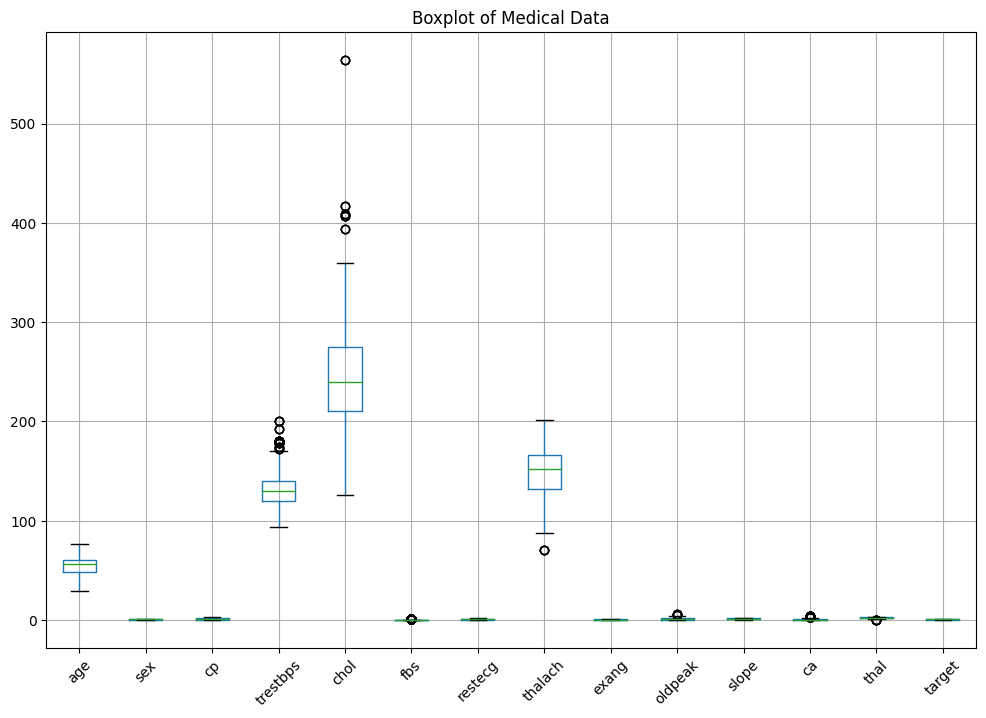

In [4]:
columns_to_check = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

plt.figure(figsize=(12, 8))
df[columns_to_check].boxplot()
plt.title('Boxplot of Medical Data')
plt.xticks(rotation=45)
plt.savefig('Outliers_before')
plt.show()

<ipython-input-5-99784d3c0efe>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, linewidth=1.5, palette=colors, saturation=0.75)
<ipython-input-5-99784d3c0efe>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, linewidth=1.5, palette=colors, saturation=0.75)
<ipython-input-5-99784d3c0efe>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, linewidth=1.5, palette=colors, saturation=0.75)
<ipython-input-5-99784d3c0efe>:13: FutureWarning: 

Passing `palette` withou

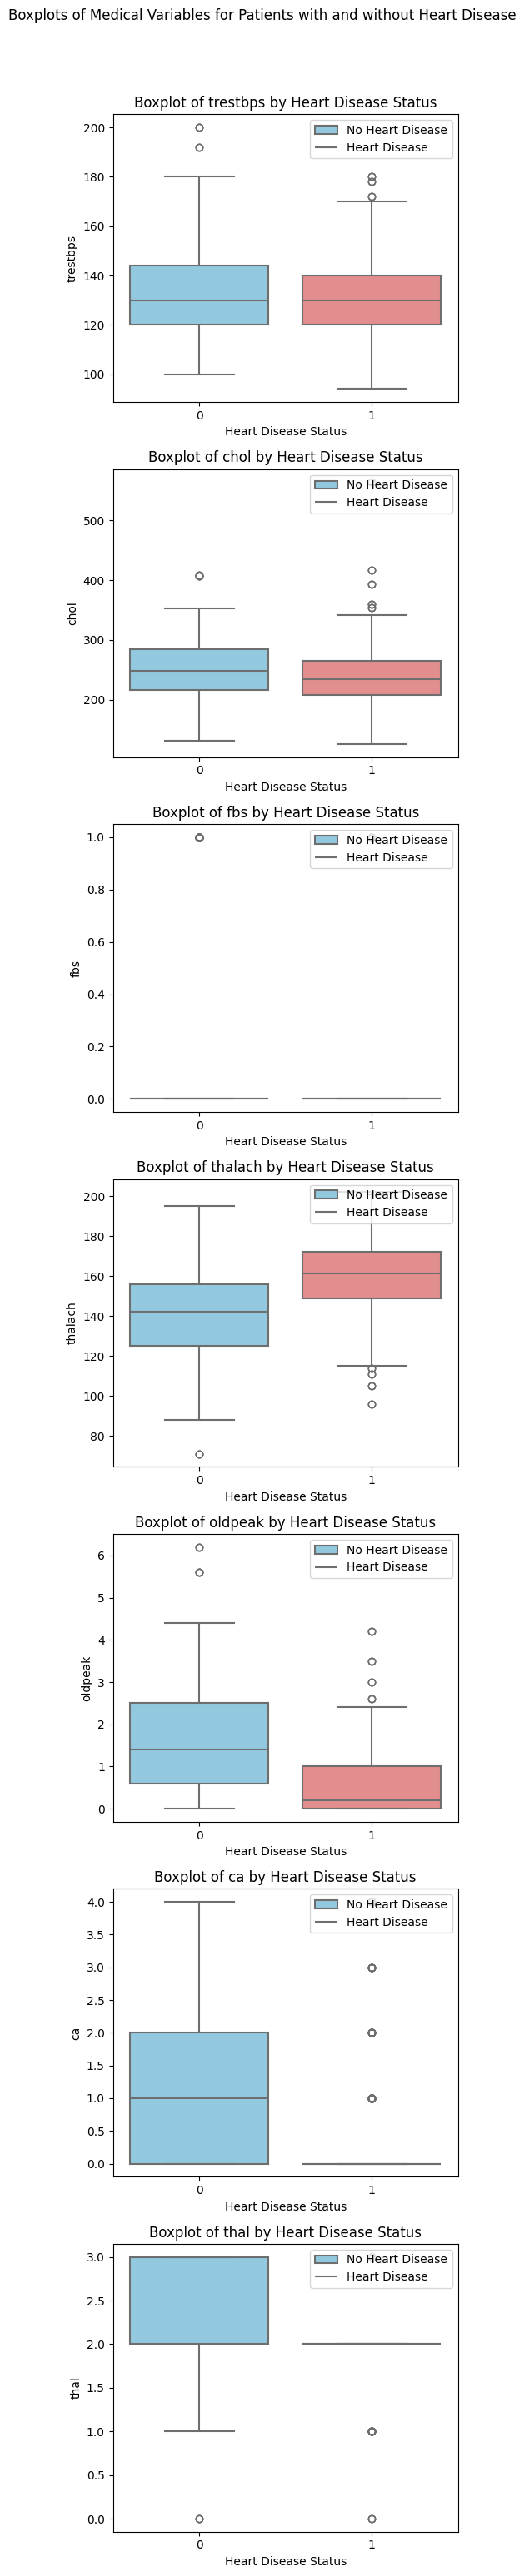

In [5]:
# Columns to compare
columns_to_compare = ['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']

# Set up the matplotlib figure
plt.figure(figsize=(5, 30))

# Define color palette
colors = ['skyblue', 'lightcoral']

# Loop through each column and create a boxplot
for i, col in enumerate(columns_to_compare, 1):
    plt.subplot(len(columns_to_compare), 1, i)
    sns.boxplot(x='target', y=col, data=df, linewidth=1.5, palette=colors, saturation=0.75)
    plt.title(f'Boxplot of {col} by Heart Disease Status')
    plt.xlabel('Heart Disease Status')
    plt.ylabel(col)
    plt.legend(['No Heart Disease', 'Heart Disease'], loc='upper right')


# Adjust layout and display the plot
plt.tight_layout()
plt.suptitle('Boxplots of Medical Variables for Patients with and without Heart Disease', y=1.03)
plt.savefig('Outliers_analysis.png')
plt.show()

Outliers for trestbps (Count: 30):
     Variable  Index  Value  Heart Disease Status
29   trestbps     29    180                     0
47   trestbps     47    178                     0
87   trestbps     87    174                     0
137  trestbps    137    180                     1
151  trestbps    151    192                     0
175  trestbps    175    200                     0
229  trestbps    229    178                     0
246  trestbps    246    192                     0
257  trestbps    257    180                     1
294  trestbps    294    200                     0
326  trestbps    326    192                     0
343  trestbps    343    172                     1
396  trestbps    396    180                     0
436  trestbps    436    174                     0
452  trestbps    452    178                     0
496  trestbps    496    180                     0
508  trestbps    508    200                     0
509  trestbps    509    180                     0
528  trestbps  

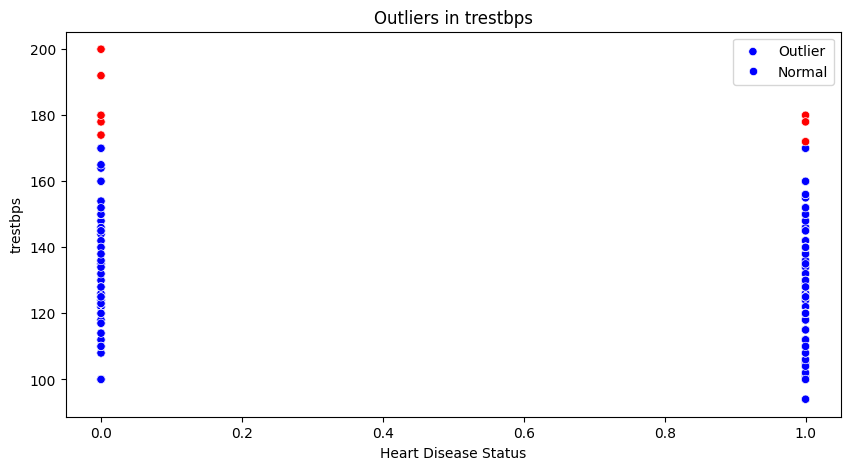

Outliers for chol (Count: 16):
    Variable  Index  Value  Heart Disease Status
123     chol    123    417                     1
158     chol    158    564                     1
179     chol    179    409                     0
192     chol    192    564                     1
255     chol    255    394                     1
450     chol    450    407                     0
464     chol    464    564                     1
481     chol    481    407                     0
542     chol    542    394                     1
578     chol    578    394                     1
641     chol    641    409                     0
665     chol    665    417                     1
685     chol    685    407                     0
889     chol    889    407                     0
958     chol    958    417                     1
996     chol    996    409                     0



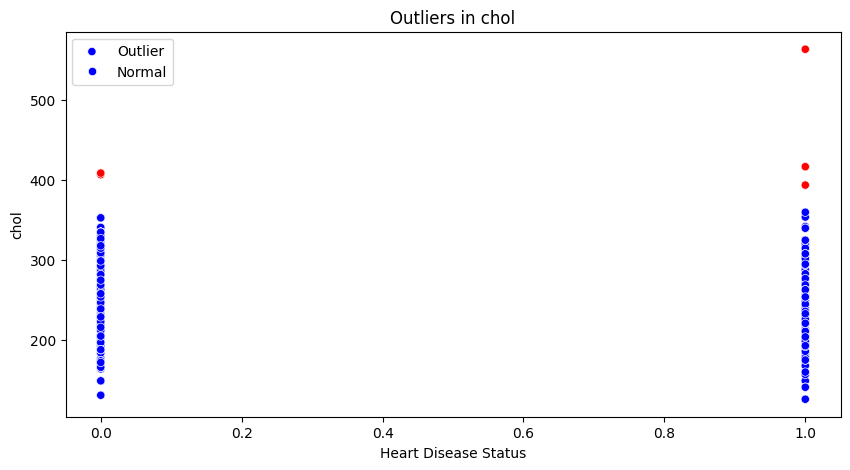

Outliers for fbs (Count: 153):
     Variable  Index  Value  Heart Disease Status
1         fbs      1      1                     0
4         fbs      4      1                     0
11        fbs     11      1                     0
14        fbs     14      1                     0
19        fbs     19      1                     1
...       ...    ...    ...                   ...
993       fbs    993      1                     0
999       fbs    999      1                     0
1003      fbs   1003      1                     1
1006      fbs   1006      1                     1
1016      fbs   1016      1                     0

[153 rows x 4 columns]



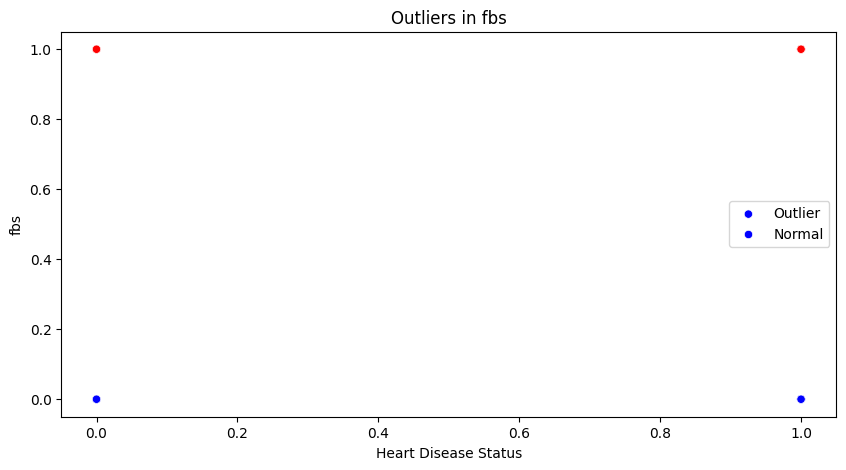

Outliers for thalach (Count: 4):
    Variable  Index  Value  Heart Disease Status
267  thalach    267     71                     0
296  thalach    296     71                     0
378  thalach    378     71                     0
559  thalach    559     71                     0



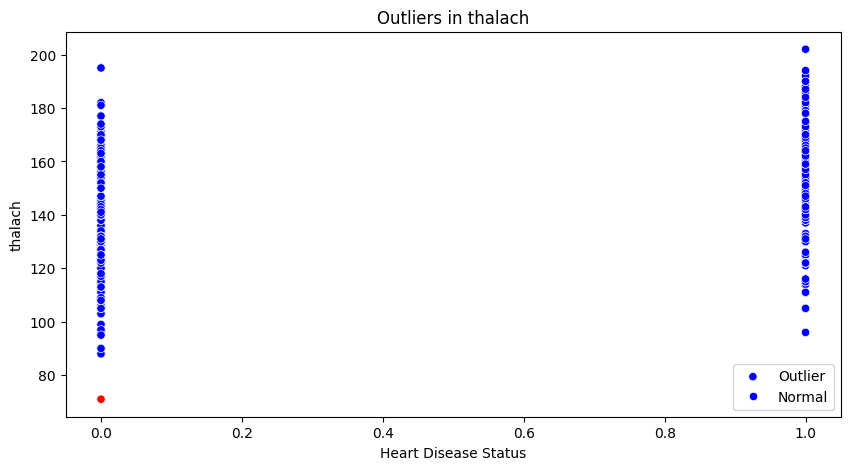

Outliers for oldpeak (Count: 7):
    Variable  Index  Value  Heart Disease Status
54   oldpeak     54    5.6                     0
55   oldpeak     55    5.6                     0
69   oldpeak     69    6.2                     0
393  oldpeak    393    6.2                     0
526  oldpeak    526    6.2                     0
613  oldpeak    613    5.6                     0
833  oldpeak    833    5.6                     0



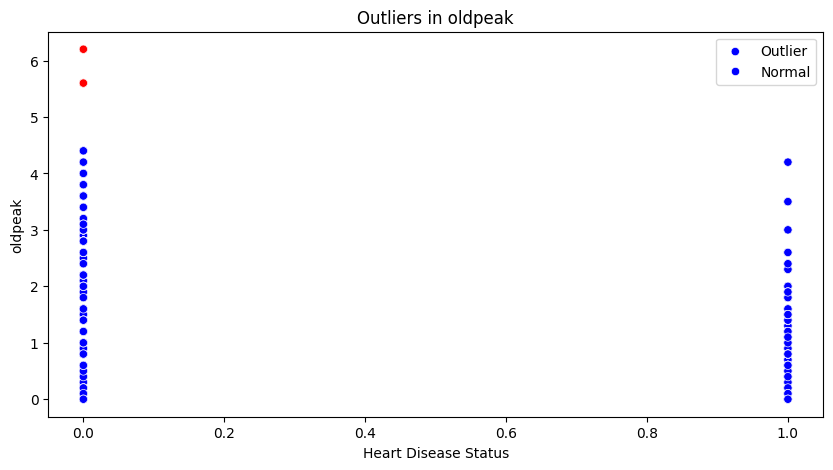

Outliers for ca (Count: 87):
     Variable  Index  Value  Heart Disease Status
4          ca      4      3                     0
6          ca      6      3                     0
13         ca     13      3                     0
52         ca     52      4                     1
53         ca     53      3                     0
...       ...    ...    ...                   ...
985        ca    985      3                     1
993        ca    993      4                     0
1003       ca   1003      3                     1
1013       ca   1013      3                     0
1015       ca   1015      3                     0

[87 rows x 4 columns]



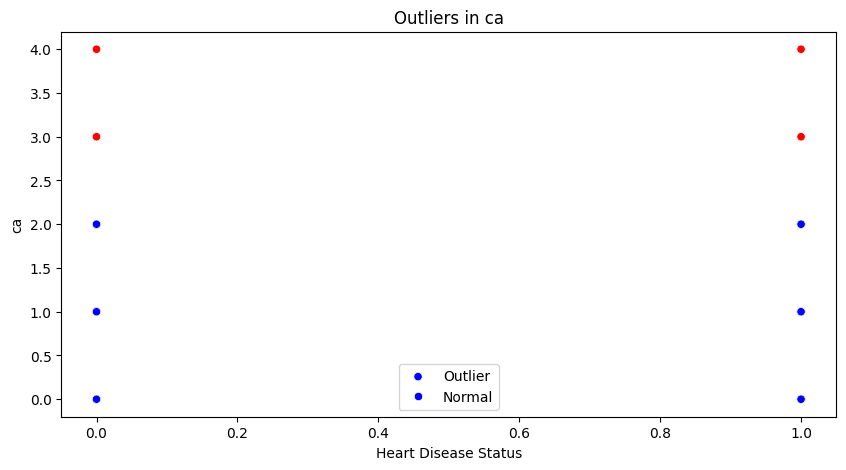

Outliers for thal (Count: 7):
    Variable  Index  Value  Heart Disease Status
14      thal     14      0                     0
319     thal    319      0                     1
329     thal    329      0                     1
359     thal    359      0                     1
686     thal    686      0                     0
734     thal    734      0                     0
893     thal    893      0                     0



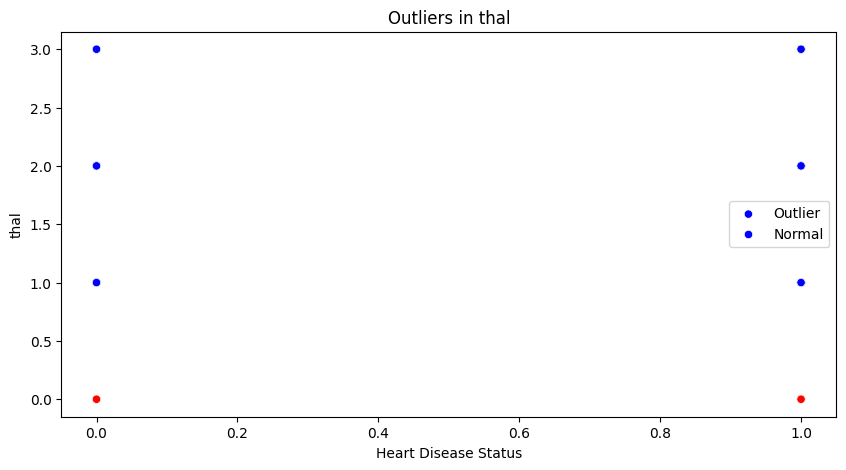

In [6]:
# List of variables to plot
variables = ['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']
heart_disease_status = 'target'  # Replace with the actual column name for heart disease status

# Identify outliers function
def find_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series[(series < lower_bound) | (series > upper_bound)]

# Create a directory for the scatter plots
os.makedirs('outliers_scatterplot', exist_ok=True)

# DataFrame to store outliers information
outliers_info = pd.DataFrame(columns=['Variable', 'Index', 'Value', 'Heart Disease Status'])

# Visualize outliers and store information
for var in variables:
    outliers = find_outliers(df[var])
    outliers_count = outliers.count()
    if outliers_count > 0:
        # Store outliers information
        outliers_data = pd.DataFrame({
            'Variable': var,
            'Index': outliers.index,
            'Value': outliers.values,
            'Heart Disease Status': df.loc[outliers.index, heart_disease_status]
        })

        # Display outliers information as a DataFrame
#        print(f"Outliers for {var}:")
        print(f"Outliers for {var} (Count: {outliers_count}):")
        print(outliers_data)
        print()

        # Plot outliers
        plt.figure(figsize=(10, 5))
        sns.scatterplot(data=df, x=heart_disease_status, y=var, hue=df.index.isin(outliers.index), palette={True: 'red', False: 'blue'})
        plt.title(f'Outliers in {var}')
        plt.xlabel('Heart Disease Status')
        plt.ylabel(var)
        plt.legend(['Outlier', 'Normal'])
        plt.savefig(f'outliers_scatterplot/{var}_outliers.png')
        plt.show()

***Resting Blood Pressure (trestbps)***

*Outliers:* Found in both groups (with and without heart disease), mainly on the higher side.

*Insight:* High values indicate potential hypertension, a significant risk factor for heart disease.

***Cholesterol (chol)***

*Outliers:* Present in both groups, predominantly higher values.

*Insight:* Elevated cholesterol is a known risk factor for heart disease.

***Fasting Blood Sugar (fbs)***

*Outliers:* Only one notable outlier in the group without heart disease.

*Insight:* Binary variable indicating elevated blood sugar; outliers may be rare but significant.

***Maximum Heart Rate (thalach)***

*Outliers:* Present in both groups, mainly lower values in the heart disease group.

*Insight:* Lower maximum heart rates may indicate poor exercise tolerance or heart issues.

***ST Depression (oldpeak)***

*Outliers:* Found in both groups, more in the group without heart disease.

*Insight:* Used to assess heart disease severity.

***Number of Major Vessels Colored by Fluoroscopy (ca)***

*Outliers:* Present in both groups.

*Insight:* Higher numbers indicate more severe heart disease.

***Thalassemia (thal)***

*Outliers:* Only in the group without heart disease.

*Insight:* A blood disorder that can confound heart disease analysis.



Based on the insights gained from analyzing outliers, it is evident that while the main trends—such as high peaks for individuals with heart disease—are accurately captured, the presence of outliers across both groups raises concerns about data accuracy. These outliers, though present in both groups, suggest variability or anomalies that need to be addressed before proceeding further with model selection and analysis.

For fixing these outliers Im using the Winsorization Method.

Winsorization: This method replaces extreme values with the nearest values within the defined bounds (lower_bound and upper_bound).

In heart disease prediction, Winsorization is used to handle outliers in medical data like blood pressure, cholesterol levels,  heart rate , and etc.

By adjusting extreme values to more reasonable bounds, Winsorization ensures that these outliers don't skew the predictive models.

This method helps in maintaining the accuracy of predictions by preventing overly influential outliers from misleading the analysis.

It's crucial because accurate predictions rely on patterns and trends in data, and outliers can otherwise distort these patterns, leading to less reliable predictions of heart disease risk or severity.

## Treating Outliers

In [7]:
from scipy.stats.mstats import winsorize

# List of variables to apply Winsorization
variables = ['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']

# Apply Winsorization for each variable
for var in variables:
    # Calculate the 5th and 95th percentiles for Winsorization bounds
    lower_bound = np.percentile(df[var], 5)
    upper_bound = np.percentile(df[var], 95)

    # Winsorize the data inplace
    df[var] = winsorize(df[var], limits=(0.05, 0.05))

# Check the updated DataFrame
print(df[variables].describe())

          trestbps         chol          fbs      thalach      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean    131.297561   244.779512     0.149268   149.363902     1.034341   
std      15.405339    43.871440     0.356527    21.293734     1.072895   
min     108.000000   175.000000     0.000000   108.000000     0.000000   
25%     120.000000   211.000000     0.000000   132.000000     0.000000   
50%     130.000000   240.000000     0.000000   152.000000     0.800000   
75%     140.000000   275.000000     0.000000   166.000000     1.800000   
max     164.000000   330.000000     1.000000   182.000000     3.400000   

                ca         thal  
count  1025.000000  1025.000000  
mean      0.736585     2.330732  
std       0.982701     0.600197  
min       0.000000     1.000000  
25%       0.000000     2.000000  
50%       0.000000     2.000000  
75%       1.000000     3.000000  
max       3.000000     3.000000  


## Visualizing the Outliers

#Data Visualization

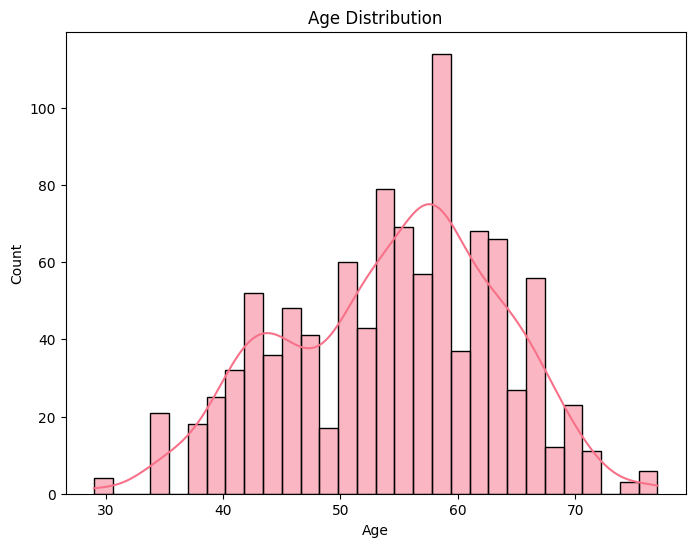

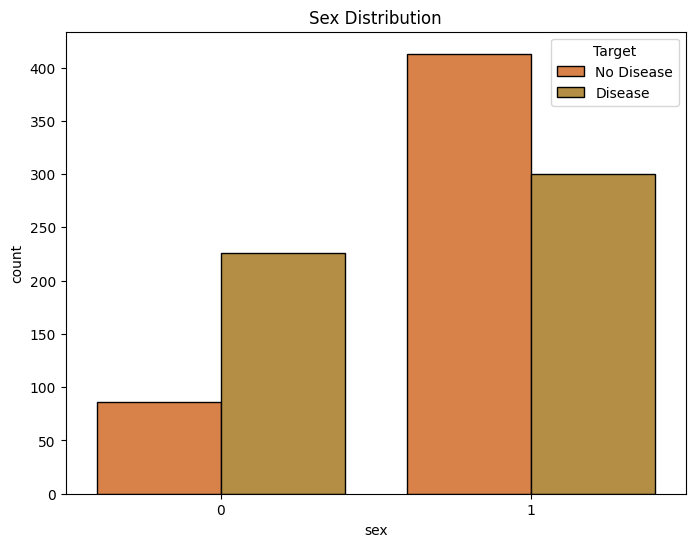

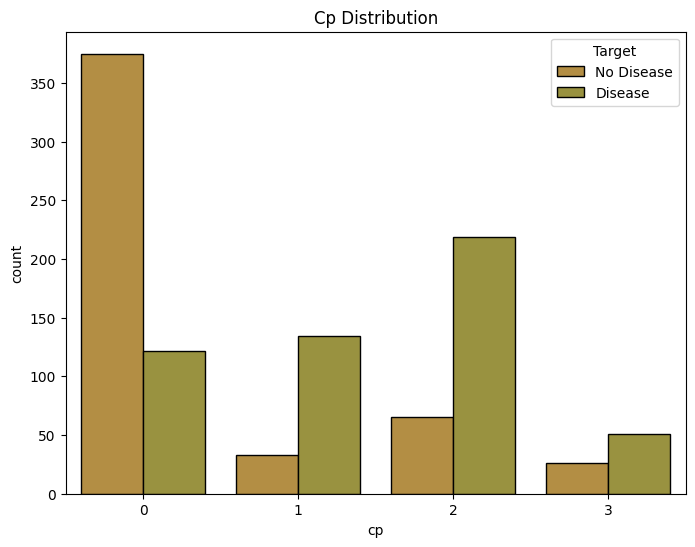

<ipython-input-11-f4765684c737>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=df, palette=[base_palette[index], base_palette[(index + 1) % len(columns_to_plot)]], ax=ax)


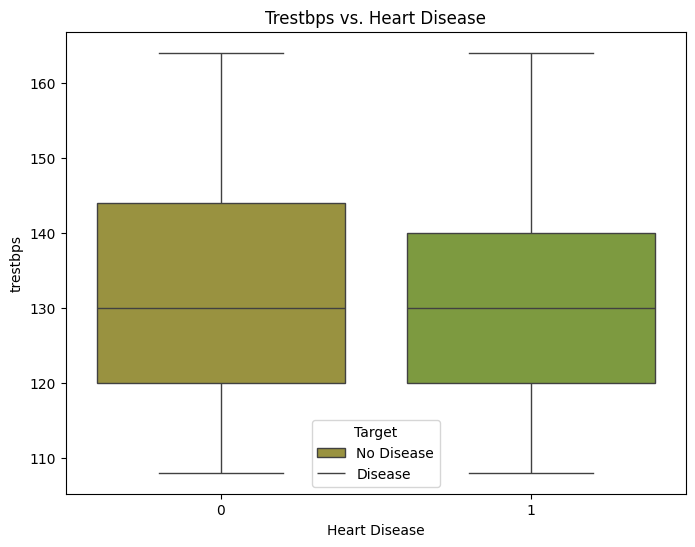

<ipython-input-11-f4765684c737>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=df, palette=[base_palette[index], base_palette[(index + 1) % len(columns_to_plot)]], ax=ax)


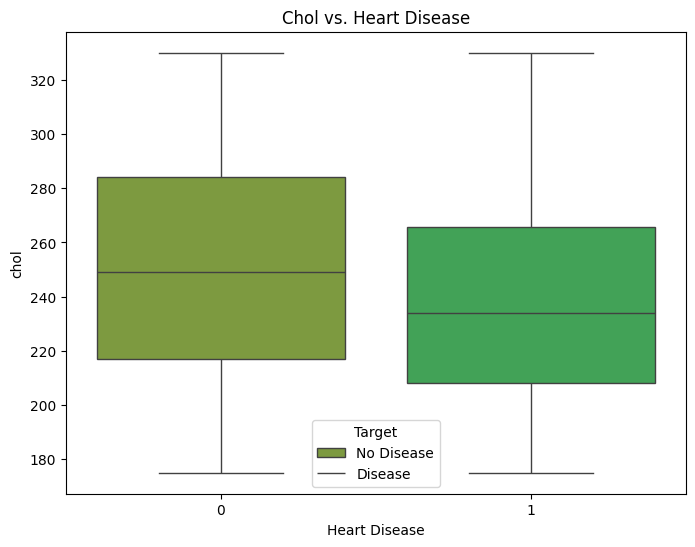

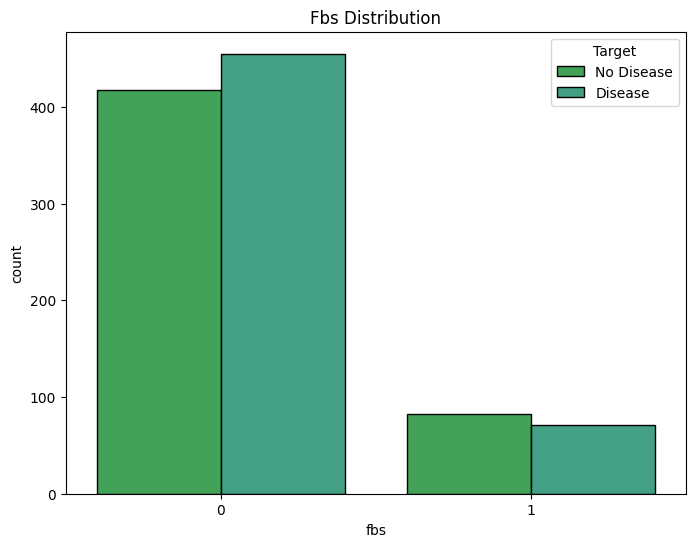

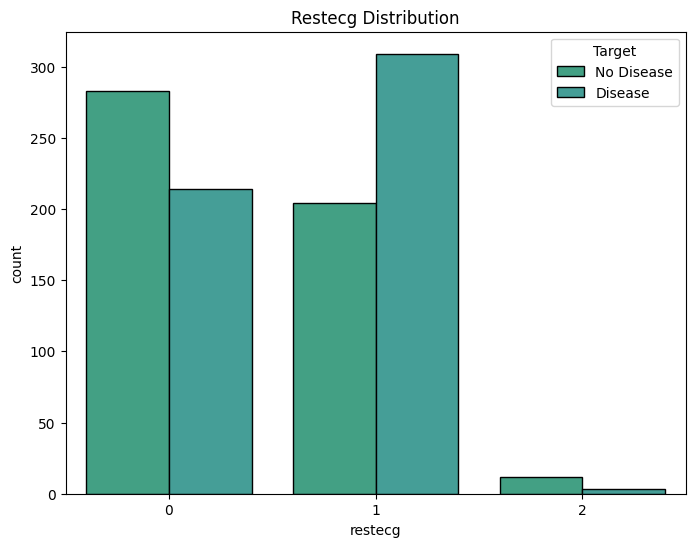

<ipython-input-11-f4765684c737>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=df, palette=[base_palette[index], base_palette[(index + 1) % len(columns_to_plot)]], ax=ax)


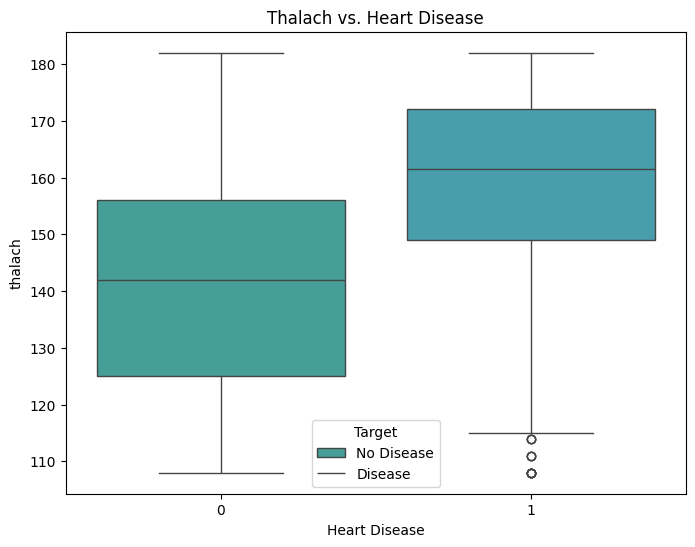

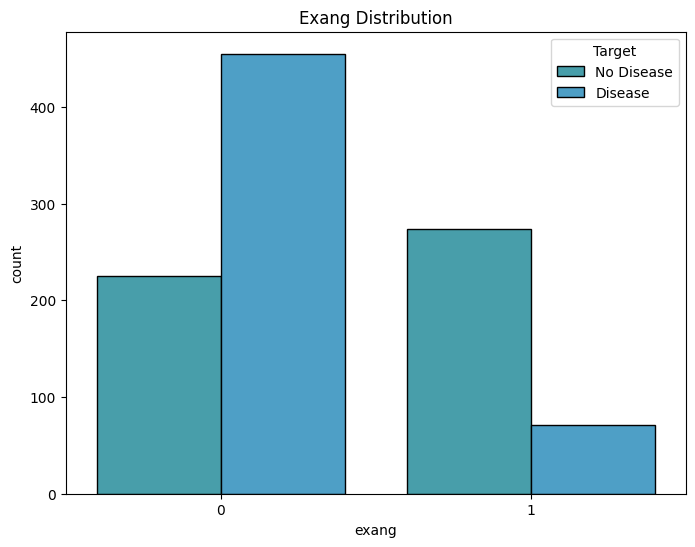

<ipython-input-11-f4765684c737>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=df, palette=[base_palette[index], base_palette[(index + 1) % len(columns_to_plot)]], ax=ax)


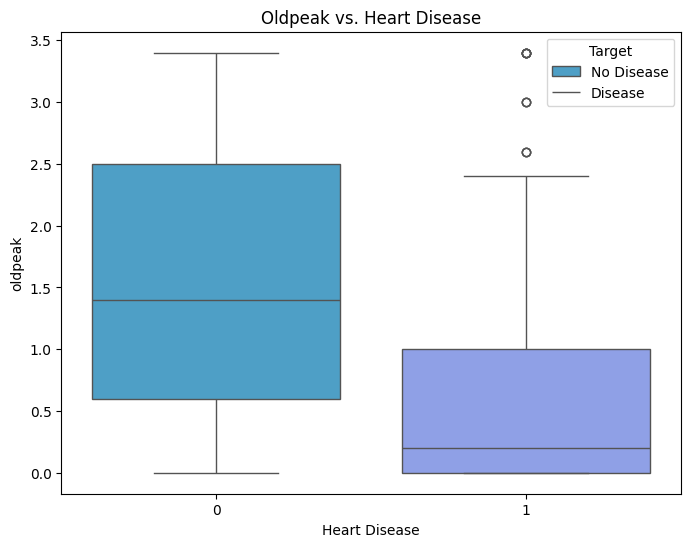

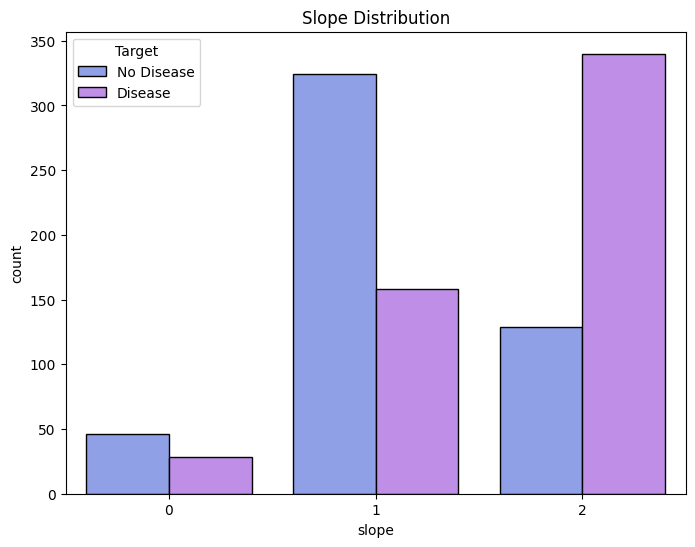

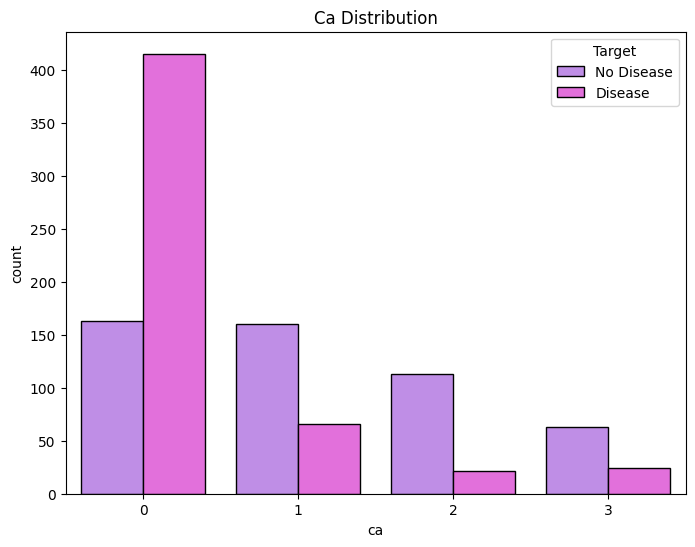

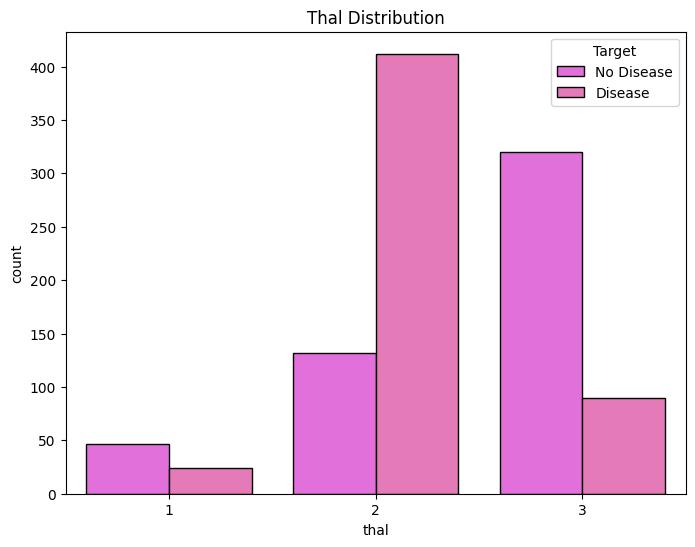

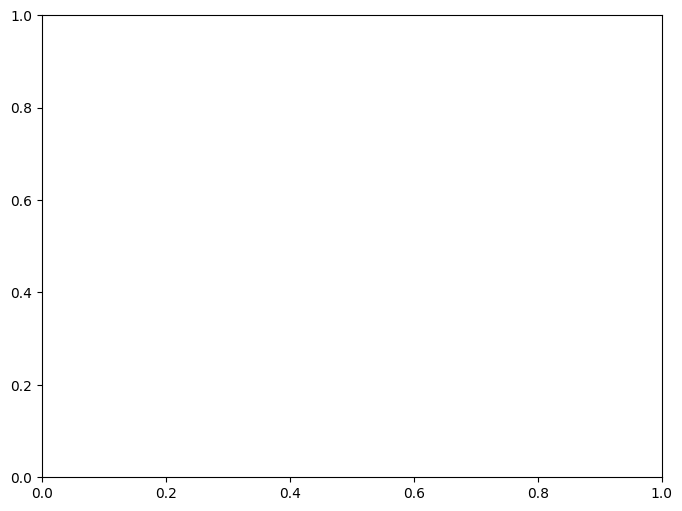

Plots saved successfully in the directory: Plot5 - data analyze


In [ ]:
# Create a directory to save plots if it doesn't exist
save_dir = 'Plot5 - data analyze'
os.makedirs(save_dir, exist_ok=True)

# List of columns excluding 'target' column
columns_to_plot = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                   'restecg', 'thalach', 'exang', 'oldpeak',
                   'slope', 'ca', 'thal', 'target']

# Define a palette for the entire set of columns
base_palette = sns.color_palette('husl', n_colors=len(columns_to_plot))

# Plot each column individually
for index, column in enumerate(columns_to_plot):
    plt.figure(figsize=(8, 6))  # Create a new figure for each plot
    ax = plt.gca()  # Get the current axis

    # Determine plot type based on column
    if column == 'age':
        sns.histplot(df[column], bins=30, kde=True, color=base_palette[index], edgecolor='black', ax=ax)
        plt.xlabel('Age')
        plt.title('Age Distribution')
    elif column in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']:
        sns.countplot(x=column, hue='target', data=df, palette=[base_palette[index], base_palette[(index + 1) % len(columns_to_plot)]], edgecolor='black', ax=ax)
        plt.xlabel(column)
        plt.title(f'{column.capitalize()} Distribution')
        plt.legend(title='Target', labels=['No Disease', 'Disease'])
    elif column in ['trestbps', 'chol', 'thalach', 'oldpeak']:
        sns.boxplot(x='target', y=column, data=df, palette=[base_palette[index], base_palette[(index + 1) % len(columns_to_plot)]], ax=ax)
        plt.xlabel('Heart Disease')
        plt.ylabel(column)
        plt.title(f'{column.capitalize()} vs. Heart Disease')
        plt.legend(title='Target', labels=['No Disease', 'Disease'])


    # Save the plot
    plot_filename = os.path.join(save_dir, f'{column}_plot.png')
    plt.savefig(plot_filename)
    plt.show()
    plt.close()  # Close the figure to avoid displaying it

print("Plots saved successfully in the directory:", save_dir)


***1. AGE***

The age distribution appears to be in bell-shaped, with a peak around the age of 60.
Most individuals in the dataset are between the ages of 40 and 70, with a higher concentration in the 50-60 age range.

***2. SEX***

The plot shows a higher number of males with heart disease compared to females, it suggests that males have a higher probability of getting heart disease in the dataset.

***3. Chest Pain Type***

* ***Typical Angina*** is more common with individuals without heart disease.

* ***Atypical Angina, Non-Anginal Pain, and Asymptomatic*** chest pain types are more frequent in individuals with heart disease, suggesting they are stronger indicators for the condition.

***4. Resting Blood Pressure***

The box plot shows the distribution of resting blood pressure for people with and without heart disease.
We can see that people with heart disease tend to have higher resting blood pressure than people without heart disease

***5. Serum Cholesterol Levels***

People with heart disease tend to have higher cholesterol levels, with a wider range of values. The outliers indicate some individuals have exceptionally high cholesterol levels. This suggests a potential relationship between high cholesterol and heart disease risk.

***6. Fasting Blood Sugar***

The graph compares Resting Blood Pressure (mm Hg) to a target. The target appears to be around to be above 100 mm Hg, with a mention of Heart Disease. The graph suggests that blood pressure above the target range may be associated with Heart Disease.

***7. Resting Electrocardiographic Results***

* ***Resting ECG Result 0 (Normal):*** This result is more common in individuals without heart disease, indicating that normal ECG results are associated with a lower likelihood of having heart disease.

* ***Resting ECG Result 1 (Abnormality):*** This result is more common in individuals with heart disease, suggesting that ECG abnormalities are an indicator of heart disease.

* ***Resting ECG Result 2 (Left ventricular hypertrophy)***: This result is rare but slightly more prevalent in individuals with heart disease, indicating a heart disease.

***8. Maximum Heart Rate Achieved***

The plot shows that people with heart disease tend to have a higher maximum heart rate achieved, than those without heart disease.

This suggests that a higher maximum heart rate achieved could be a risk factor for heart disease

***9. Exercise-Induced Angina***

The people with exercise-induced angina are more likely to have heart disease. Specifically, people who experience exercise-induced angina are more likely to have heart disease.

***10. ST Depression Induced by Exercise***

The median ST depression for patients with heart disease is lower than the median for patients without heart disease.

There are also more outliers among the patients with heart disease, suggesting a greater variability in ST depression among this group.

***11. Slope of Peak Exercise ST Segment***

***Flat ST Segment (value 1):*** The majority of patients with a flat ST segment during peak exercise do not have heart disease. This suggests a flat ST segment may be more prevalent in individuals without heart disease.


***Downsloping ST Segment (value 2):*** There's a significant increase in the number of patients with heart disease when the slope of the ST segment is downsloping during peak exercise. This implies a downsloping ST segment may be a stronger indicator of heart disease.


***Upsloping ST Segment (value 0):*** This category appears to have fewer individuals compared to the other two categories, indicating it might be less common.

***12. Number of Major Vessels Colored by Fluoroscopy***

The number of major vessels colored by fluoroscopy is generally lower in people with heart disease.


There is a large number of people with heart disease who have 0 major vessels colored by fluoroscopy, and a smaller number of people without heart disease who have 4 major vessels colored by fluoroscopy.

***13. Thalassemia***

The distribution of thalassemia in patients with and without heart disease shows that a higher percentage of people with heart disease have thalassemia (value 2) compared to people without heart disease.

#Correlation

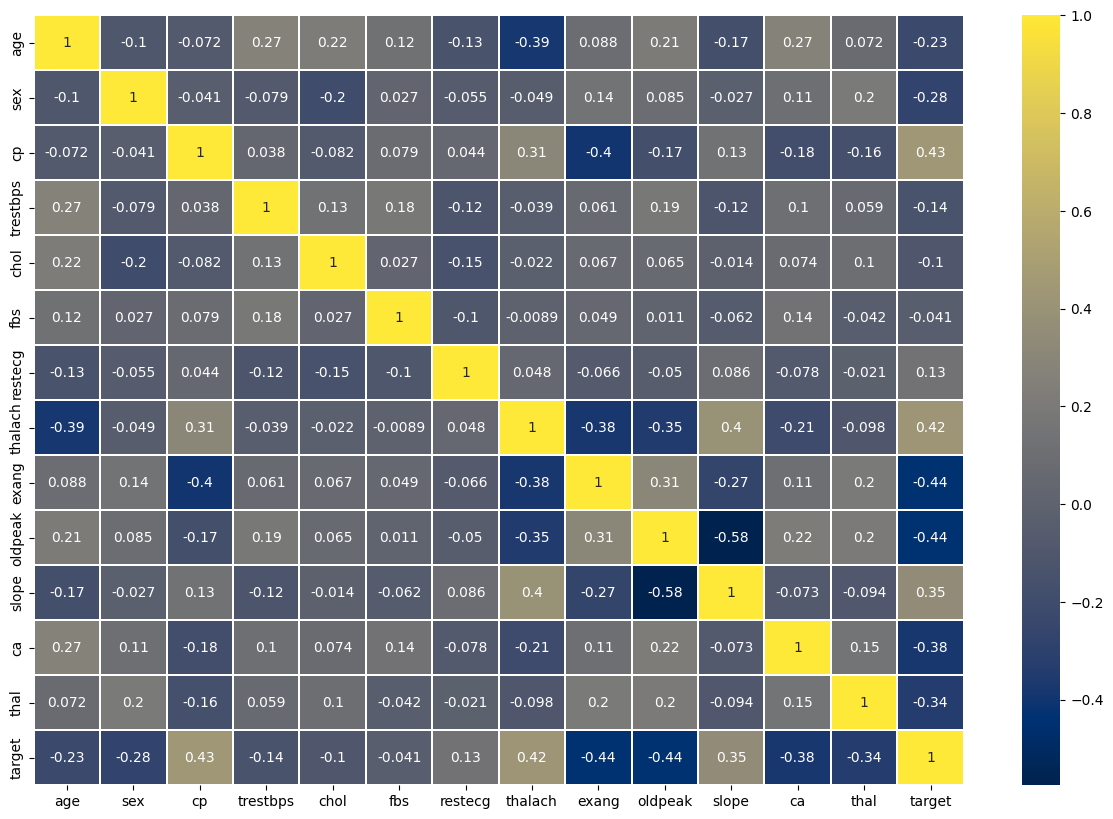

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidth=.01,annot=True,cmap="cividis")
plt.savefig('correlationfigure')
plt.show()

***Observations:***
---------------------------------------------------------------------------
***Strong Positive Correlations:***

***cp and target (0.43):*** Higher chest pain type is associated with the *presence of heart disease.*

***Strong Negative Correlations:***

***thalach and target (-0.42):*** Higher maximum heart rate achieved is associated with the *absence of heart disease.*

***oldpeak and target (-0.44):*** Higher ST depression is associated with the *presence of heart disease.*

***exang and target (-0.44):*** Exercise-induced angina is associated with the *presence of heart disease.*

The correlation matrix helps to understand the relationships between different variables. In this dataset, some variables like cp, thalach, oldpeak, and exang show strong correlations with the target variable, indicating their potential importance in predicting heart disease.

# Feature engineering

In [8]:
# Initialize two empty lists to store categorical and continuous column names
categorical_val = []
continuous_val = []

# Iterate through each column in the dataset
for column in df.columns:
    # Print a separator to distinguish between columns
    print("——————–")

    # Print the column name and its unique values
    print(f"{column} : {df[column].unique()}")

    # Check if the number of unique values in the column is less than or equal to 10
    if len(df[column].unique()) <= 10:
        # If true, append the column name to the categorical_val list
        categorical_val.append(column)
    else:
        # If false, append the column name to the continuous_val list
        continuous_val.append(column)

——————–
age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
——————–
sex : [1 0]
——————–
cp : [0 1 2 3]
——————–
trestbps : [125 140 145 148 138 108 114 160 120 122 112 132 118 128 124 135 130 136
 164 129 150 146 117 152 154 134 144 123 110 142 126 115 155 156]
——————–
chol : [212 203 175 294 248 318 289 249 286 330 210 298 204 308 266 244 211 185
 223 208 252 209 307 233 319 256 327 269 196 231 213 271 263 229 258 226
 228 278 230 283 241 188 217 193 245 232 299 288 197 315 215 326 207 177
 257 255 187 201 220 268 267 236 303 282 309 186 275 281 206 218 254 295
 260 240 302 192 225 325 235 274 234 182 321 300 199 304 222 184 247 239
 246 293 180 250 221 200 227 243 311 261 242 205 306 219 198 183 237 224
 265 313 259 270 216 264 276 322 214 273 253 176 284 305 290 277 262 195
 178]
——————–
fbs : [0 1]
——————–
restecg : [1 0 2]
——————–
thalach : [168 155 125 161 108 122 140 145 144 116 136 182 156 142 109 16

##***One-hot encoding***

By one-hot encoding the categorical columns, we can convert them into a format that can be used by machine learning algorithms.

In [9]:
# Remove the 'target' column from the list of categorical columns
categorical_val.remove('target')

# Perform one-hot encoding on the categorical columns
dfd = pd.get_dummies(df, columns=categorical_val).astype(int)

In [10]:
dfd.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,52,125,212,168,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1
1,53,140,203,155,3,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
2,70,145,175,125,2,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,61,148,203,161,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
4,62,138,294,108,1,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0


## Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the data
scaled_data = scaler.fit_transform(dfd)


In the case of heart disease prediction, StandardScaler can handle the differences in range between the features. The StandardScaler is used to scale all the features, so that the machine learning model can better adapt to the dataset.


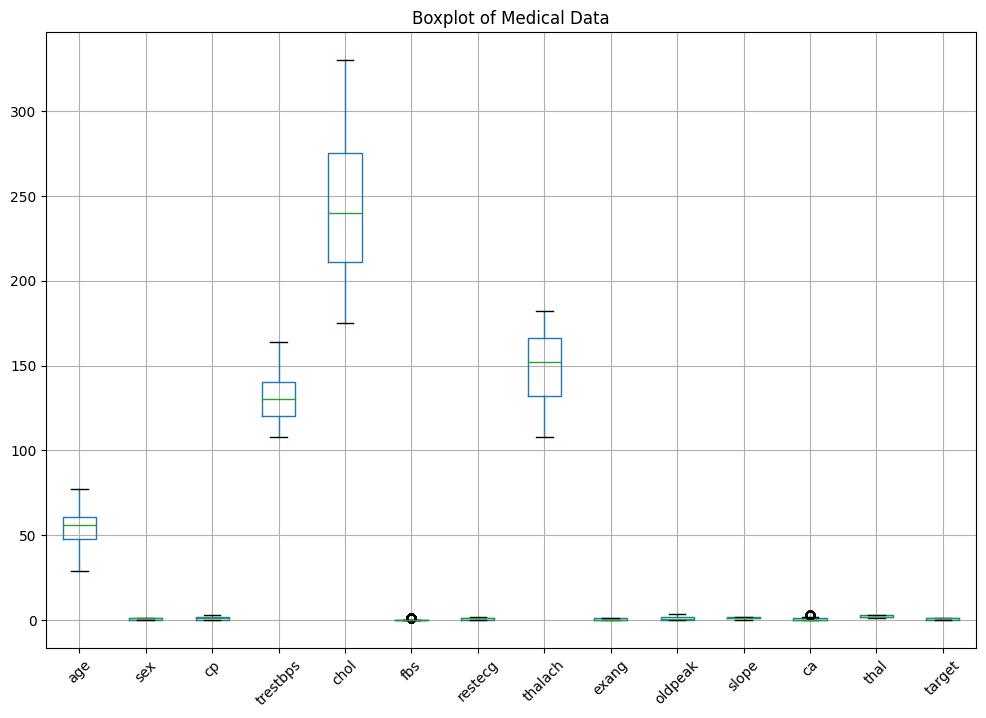

In [12]:
columns_to_check = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

plt.figure(figsize=(12, 8))
df[columns_to_check].boxplot()
plt.title('Boxplot of Medical Data')
plt.xticks(rotation=45)
plt.savefig('Outliers_After')
plt.show()

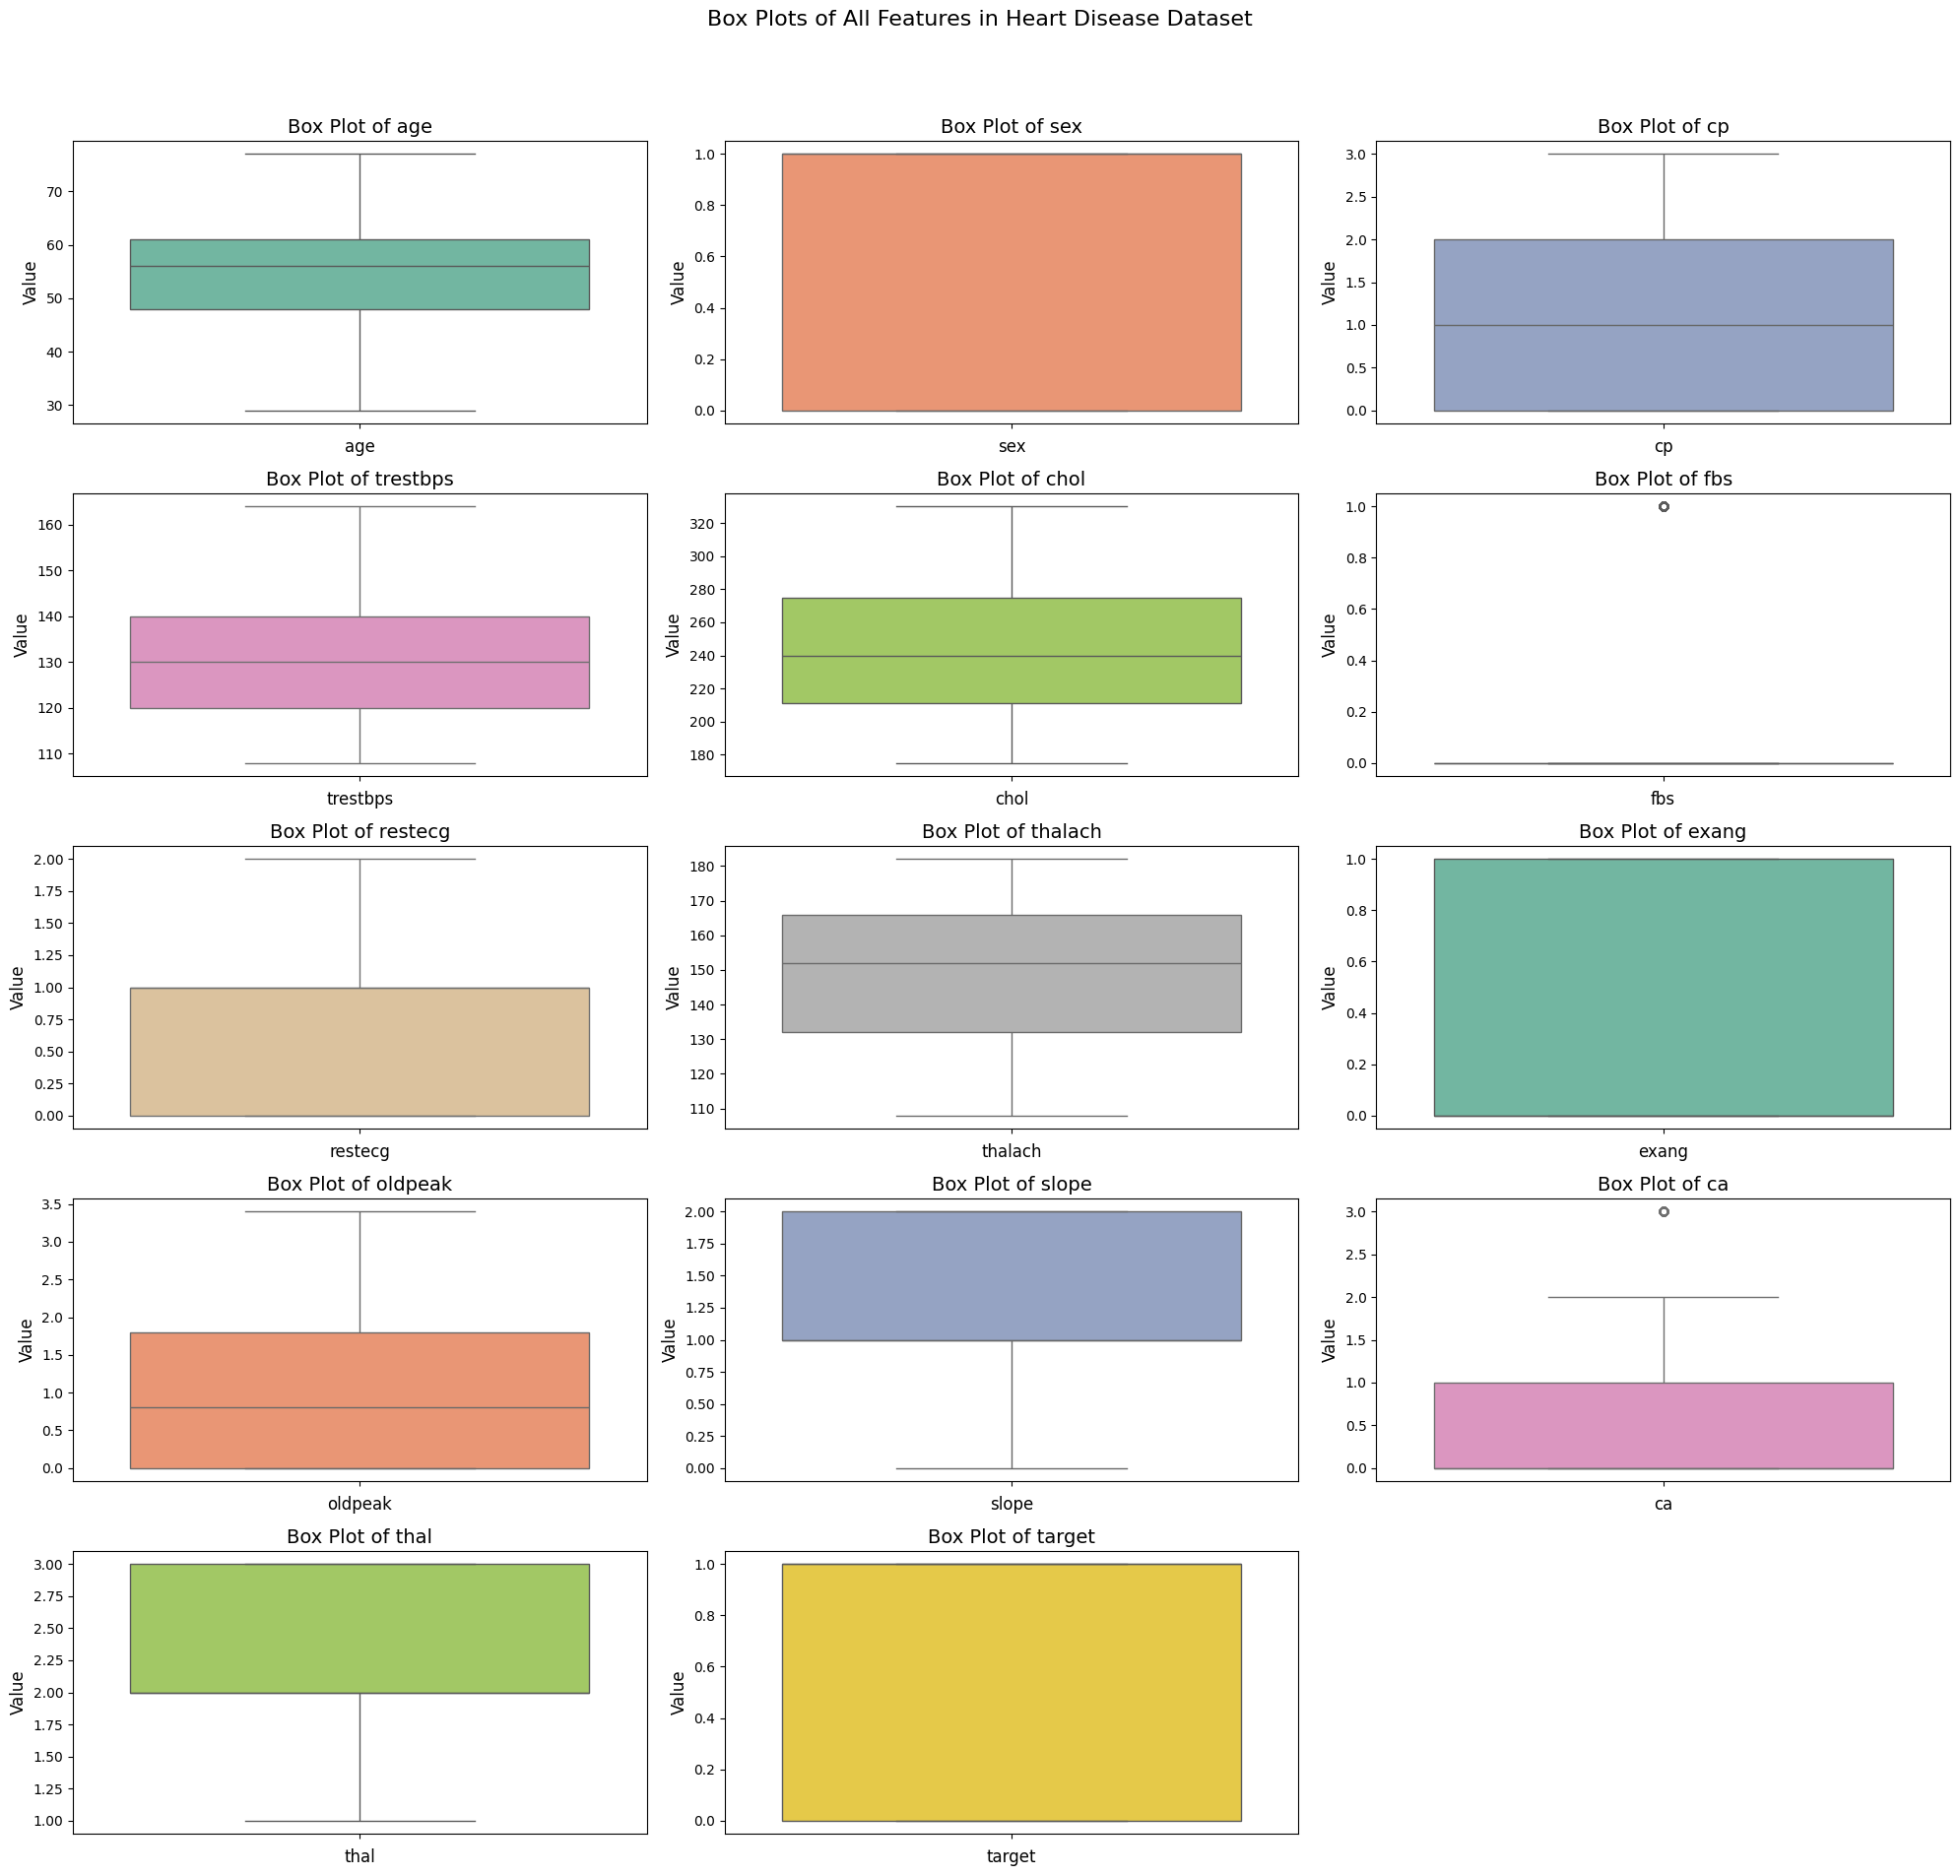

In [13]:
# Set the color palette
palette = sns.color_palette("Set2")
# Create subplots for all features
fig, axes = plt.subplots(ncols=3, nrows=(len(df.columns) + 2) // 3, figsize=(20, 20))
# Flatten the axes array for easy iteration
axes = axes.flatten()
for i, (column, axis) in enumerate(zip(df.columns, axes)):
    sns.boxplot(data=df[column], ax=axis, color=palette[i % len(palette)])
    axis.set_title(f'Box Plot of {column}', fontsize=14)
    axis.set_xlabel(column, fontsize=12)
    axis.set_ylabel('Value', fontsize=12)
# Hide any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
# Adjust layout and add a title
plt.suptitle('Box Plots of All Features in Heart Disease Dataset', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Overall_Outliers')
plt.show()

**1. Age**
* ***Description:*** The box plot of age shows the distribution of patients' ages.
* ***Outliers:*** There are no visible outliers in the age box plot.

***2. Sex***
* ***Description:*** The box plot of sex shows a binary distribution, likely representing male (0) and female (1) patients.
* ***Outliers:*** There are no visible outliers as this is a categorical variable with only two possible values.

***3. Cp (Chest Pain Type)***
* ***Description:*** The box plot of cp shows different types of chest pain experienced by patients.
* ***Outliers:*** There are no visible outliers, but the distribution shows varying chest pain types.

***4. Trestbps (Resting Blood Pressure)***
* ***Description:*** The box plot of trestbps represents the distribution of resting blood pressure.
* ***Outliers:*** There are several outliers above the upper whisker, indicating patients with higher than usual resting blood pressure.

***5. Chol (Serum Cholesterol)***
* ***Description:*** The box plot of chol shows the distribution of serum cholesterol levels.
* ***Outliers:*** There are several outliers above the upper whisker, indicating patients with higher than usual cholesterol levels.

***6. Fbs (Fasting Blood Sugar)***
* ***Description:*** The box plot of fbs shows the fasting blood sugar levels, likely with a threshold of 120 mg/dl.
* ***Outliers:*** There are no visible outliers as this is a binary variable with only two possible values.

***7. Restecg (Resting Electrocardiographic Results)***
* ***Description:*** The box plot of restecg shows different ECG results.
* ***Outliers:*** There are no visible outliers, indicating a typical distribution of ECG results.

***8. Thalach (Maximum Heart Rate Achieved)***
* ***Description:*** The box plot of thalach represents the maximum heart rate achieved during the test.
* ***Outliers:*** There are a few outliers below the lower whisker, indicating patients with lower than usual maximum heart rate achieved.

***9. Exang (Exercise Induced Angina)***
* ***Description:*** The box plot of exang shows a binary distribution of exercise-induced angina.
* ***Outliers:*** There are no visible outliers as this is a binary variable with only two possible values.

***10. Oldpeak (ST Depression Induced by Exercise Relative to Rest)***
* ***Description:*** The box plot of oldpeak shows the ST depression induced by exercise relative to rest.
* ***Outliers:*** There are a few outliers above the upper whisker, indicating patients with higher than usual ST depression levels.

***11. Slope (Slope of the Peak Exercise ST Segment)***
* ***Description:*** The box plot of slope shows the slope of the peak exercise ST segment.
* ***Outliers:*** There are no visible outliers, indicating a typical distribution of slope values.

***12. Ca (Number of Major Vessels Colored by Fluoroscopy)***
* ***Description:*** The box plot of ca shows the number of major vessels colored by fluoroscopy.
* ***Outliers:*** There are a few outliers above the upper whisker, indicating patients with a higher number of major vessels colored by fluoroscopy.

***13. Thal (Thalassemia)***
* ***Description:*** The box plot of thal shows different types of thalassemia.
* ***Outliers:*** There are a few outliers below the lower whisker, indicating patients with a specific type of thalassemia that is less common.

***14. Target***
* ***Description:*** The box plot of target shows the presence or absence of heart disease.
* ***Outliers:*** There are no visible outliers as this is a binary variable with only two possible values.

# Train-Test Split

In [14]:
# Split the data into features (X) and target (y)
X = dfd.drop('target', axis=1)
y = dfd['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

This code prepares your data for training and testing a machine learning model.


The training set (70% of the data) is used to train the model, allowing it to learn the patterns between features and the target variable.


The testing set (30% of the data) is used to evaluate the model's performance on unseen data. This helps assess how well the model generalizes to new examples.

By splitting the data into training and testing sets, you can avoid overfitting.

# Model Training

## Getting Metrics for all the models

For chossing an appropriate machine learning algorithm for Heart Disease Prediction tasks, I'm using the mentioned models such as Logistic Regression, Decision Trees, Random Forests, Support Vector Machines, ensemble methods like Gradient Boosting , neural network - MLP
These models are commonly used in predictive analytics and have been shown effective in various healthcare applications such as Diabetes Prediction,Disease Outcome Prediction, and etc

* ***Logistic Regression***: Simple and interpretable, often used for binary classification tasks like predicting heart disease.

* ***Decision Trees***: Can capture complex interactions and are easy to interpret.

* ***Random Forests***: Improve upon decision trees by reducing overfitting and providing robust predictions.

* ***Support Vector Machines (SVM)***: Effective in high-dimensional spaces, good at handling complex relationships in data.

* ***Gradient Boosting***: Builds models sequentially, focusing on correcting errors of previous models, leading to high accuracy.

* ***Multi-layer Perceptron (MLP)***: Neural networks capable of learning complex patterns, suitable for tasks with non-linear relationships.

In [15]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'MLP Neural Network': MLPClassifier()
}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.82
Decision Tree Accuracy: 0.97
Random Forest Accuracy: 0.98
SVM Accuracy: 0.67
Gradient Boosting Accuracy: 0.95
MLP Neural Network Accuracy: 0.80


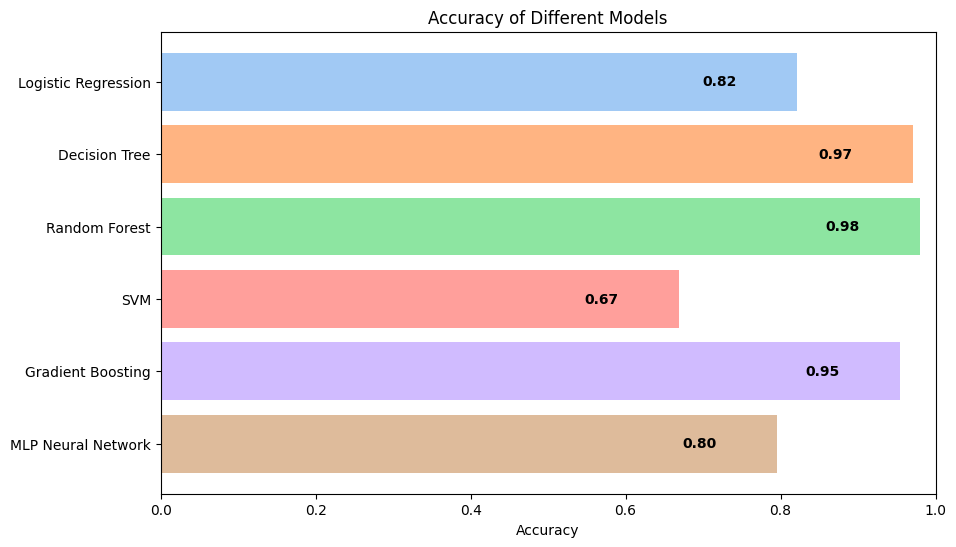

In [16]:
# Model Comparison
accuracies = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")

# Use Seaborn to create a color palette
palette = sns.color_palette("pastel", len(accuracies))

# Create a bar plot for accuracies
plt.figure(figsize=(10, 6))
bars = plt.barh(list(accuracies.keys()), list(accuracies.values()), color=palette)
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis()

# Annotate each bar with the accuracy value
for bar in bars:
    width = bar.get_width()
    plt.text(width - 0.1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}',
             ha='center', va='center', color='black', weight='bold')
    plt.savefig('Model Comparison')
plt.show()

In [17]:
from prettytable import PrettyTable
from sklearn.metrics import classification_report

# Function to print classification report using PrettyTable
def print_classification_report(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    table = PrettyTable()
    table.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]
    for label, metrics in report.items():
        if label == "accuracy":
            continue
        table.add_row([label, metrics["precision"], metrics["recall"], metrics["f1-score"], metrics["support"]])
    print(f'Classification Report for {model_name}')
    print(table)

# Print classification reports for all models
for name, model in models.items():
    y_pred = model.predict(X_test)
    print_classification_report(y_test, y_pred, name)


Classification Report for Logistic Regression
+--------------+--------------------+--------------------+--------------------+---------+
|    Class     |     Precision      |       Recall       |      F1-Score      | Support |
+--------------+--------------------+--------------------+--------------------+---------+
|      0       | 0.8561643835616438 | 0.7861635220125787 | 0.8196721311475409 |   159   |
|      1       | 0.7901234567901234 | 0.8590604026845637 | 0.8231511254019291 |   149   |
|  macro avg   | 0.8231439201758837 | 0.8226119623485713 | 0.821411628274735  |   308   |
| weighted avg | 0.8242160131429538 | 0.8214285714285714 | 0.8213551510952807 |   308   |
+--------------+--------------------+--------------------+--------------------+---------+
Classification Report for Decision Tree
+--------------+--------------------+--------------------+--------------------+---------+
|    Class     |     Precision      |       Recall       |      F1-Score      | Support |
+-------------

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
<ipython-input-18-a5de8947c4fc>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_reports, x='model', y=metric, palette="viridis")
<ipython-input-18-a5de8947c4fc>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  for p in sns.barplot(data=df_reports, x='model', y=metric, palette="viridis").patches:


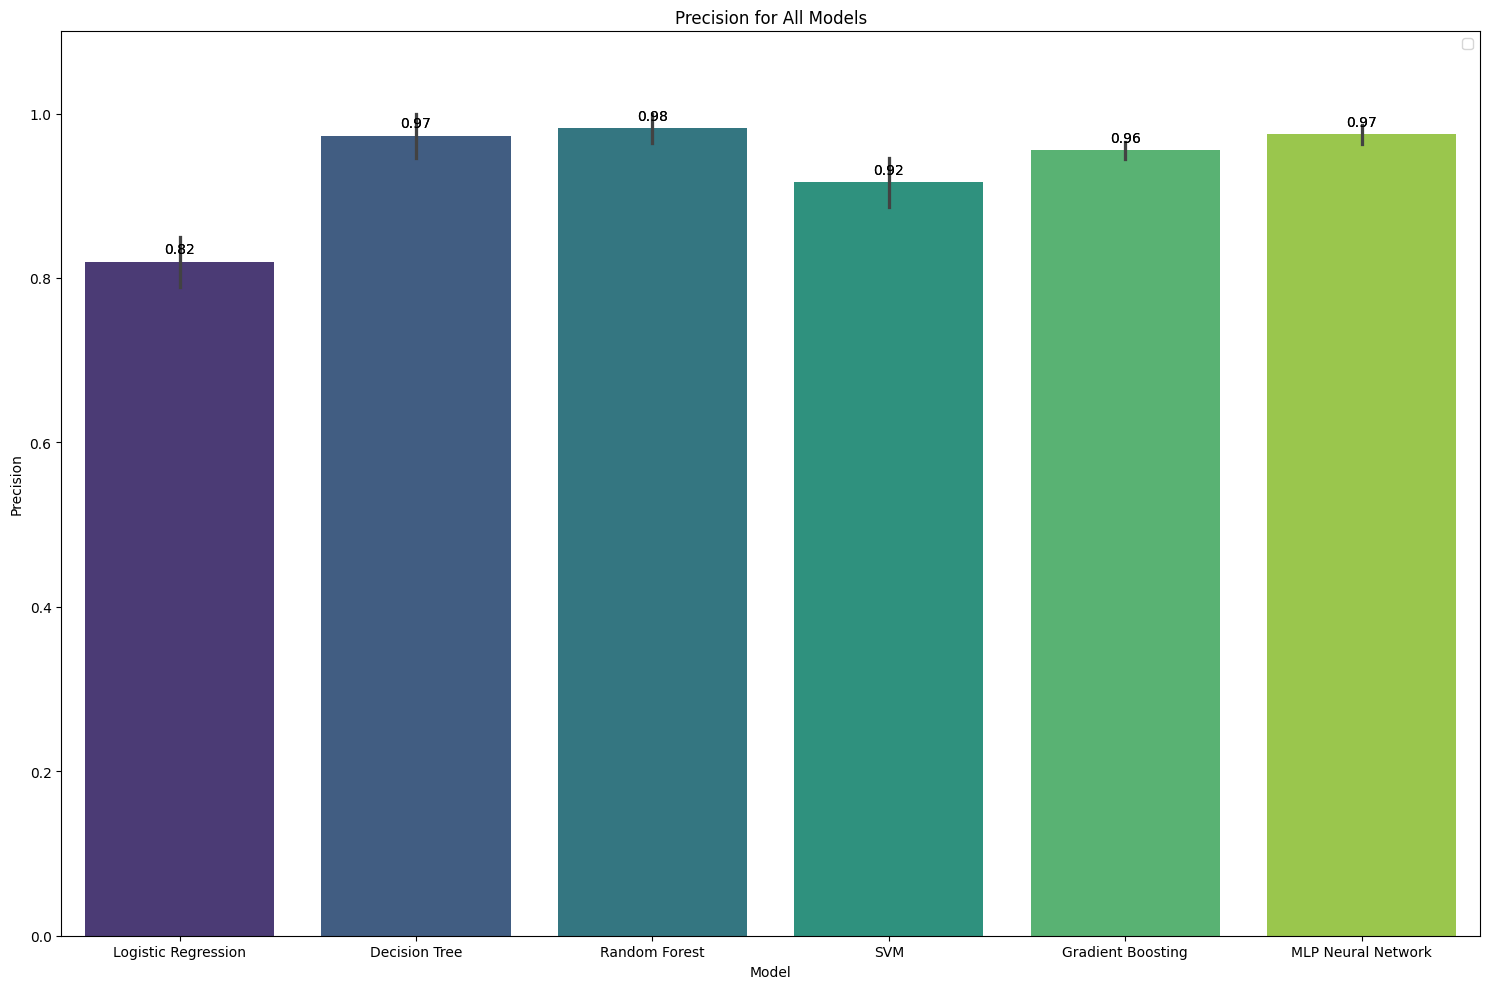

<ipython-input-18-a5de8947c4fc>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_reports, x='model', y=metric, palette="viridis")
<ipython-input-18-a5de8947c4fc>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  for p in sns.barplot(data=df_reports, x='model', y=metric, palette="viridis").patches:


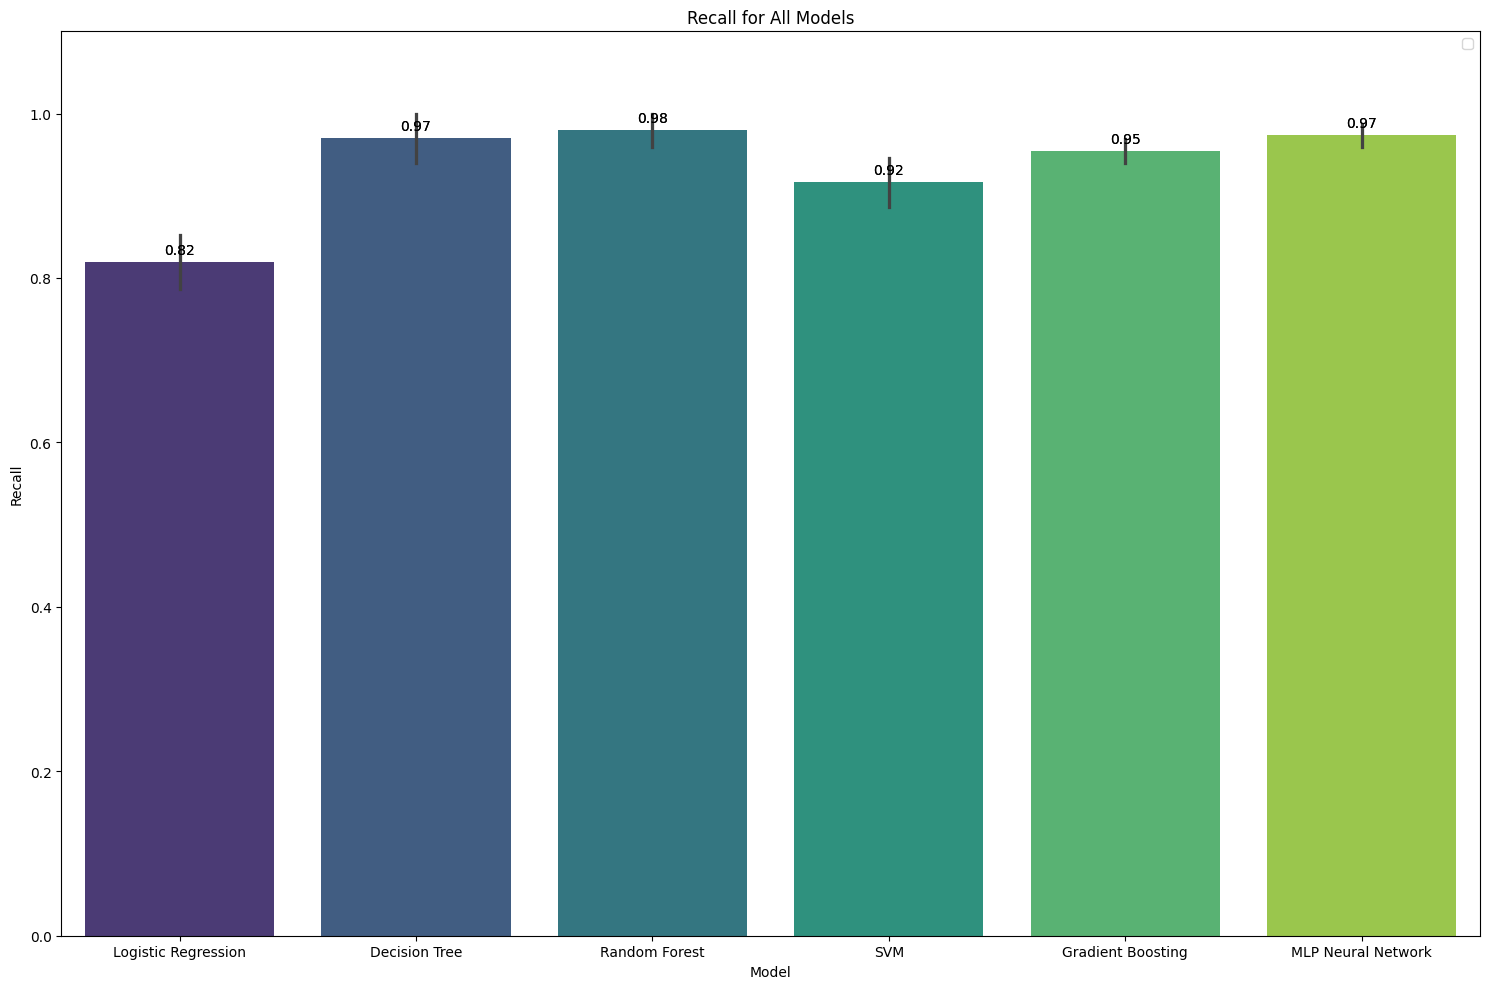

<ipython-input-18-a5de8947c4fc>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_reports, x='model', y=metric, palette="viridis")
<ipython-input-18-a5de8947c4fc>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  for p in sns.barplot(data=df_reports, x='model', y=metric, palette="viridis").patches:


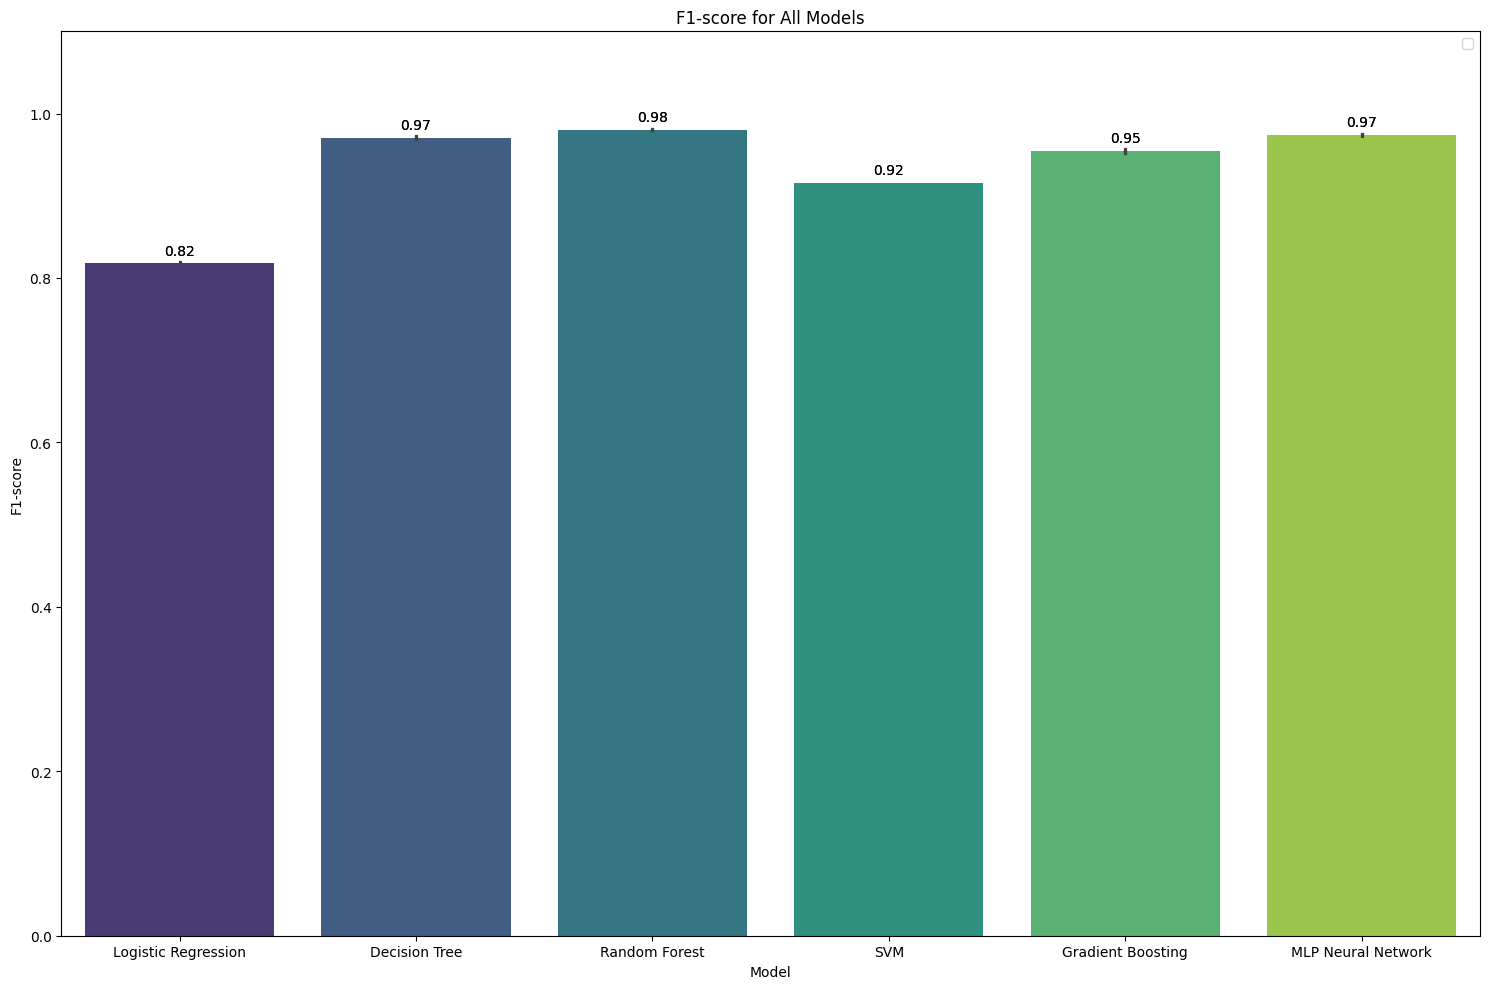

<ipython-input-18-a5de8947c4fc>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_reports, x='model', y=metric, palette="viridis")
<ipython-input-18-a5de8947c4fc>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  for p in sns.barplot(data=df_reports, x='model', y=metric, palette="viridis").patches:


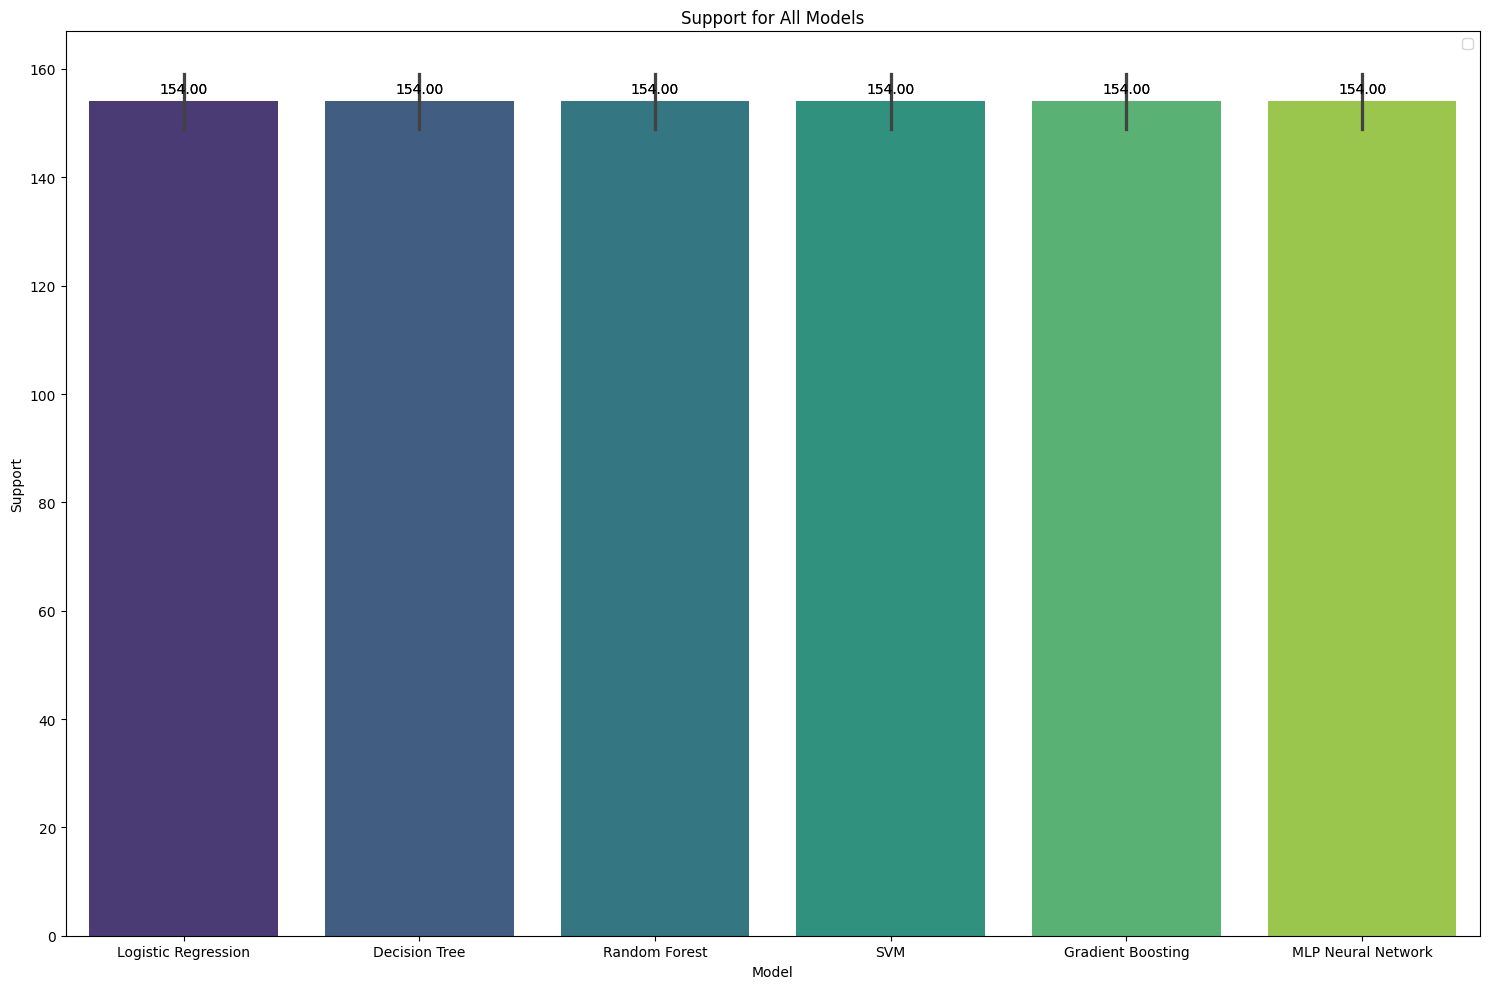

                 model  precision    recall  f1-score  support
0  Logistic Regression   0.850340  0.786164  0.816993    159.0
1  Logistic Regression   0.788820  0.852349  0.819355    149.0
0        Decision Tree   0.946429  1.000000  0.972477    159.0
1        Decision Tree   1.000000  0.939597  0.968858    149.0
0        Random Forest   0.963636  1.000000  0.981481    159.0
1        Random Forest   1.000000  0.959732  0.979452    149.0
0                  SVM   0.946309  0.886792  0.915584    159.0
1                  SVM   0.886792  0.946309  0.915584    149.0
0    Gradient Boosting   0.944785  0.968553  0.956522    159.0
1    Gradient Boosting   0.965517  0.939597  0.952381    149.0
0   MLP Neural Network   0.963190  0.987421  0.975155    159.0
1   MLP Neural Network   0.986207  0.959732  0.972789    149.0


In [18]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a dictionary to store classification reports
reports = {}

# Generate classification reports for all models
for name, model in models.items():
    if 'LogisticRegression' in str(type(model)):
        model.set_params(max_iter=1000)  # Increase max_iter for Logistic Regression
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred, output_dict=True)
    reports[name] = report

# Convert classification reports to DataFrame
metrics = ['precision', 'recall', 'f1-score', 'support']
df_reports = pd.DataFrame()

for model_name, report in reports.items():
    temp_df = pd.DataFrame(report).transpose()
    temp_df = temp_df.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')
    temp_df['model'] = model_name
    df_reports = pd.concat([df_reports, temp_df[['model'] + metrics]])

# Plotting function
def plot_metric(metric):
    plt.figure(figsize=(15, 10))
    sns.barplot(data=df_reports, x='model', y=metric, palette="viridis")
    plt.title(f'{metric.capitalize()} for All Models')
    plt.ylabel(metric.capitalize())
    plt.xlabel('Model')
    if metric != 'support':
        plt.ylim(0, 1.1)  # Ensure consistent y-axis range for better comparison
    # Display values on bars
    for p in sns.barplot(data=df_reports, x='model', y=metric, palette="viridis").patches:
        plt.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.savefig(f'{metric}_for_all_models.png')  # Save the plot
    plt.show()

# Plot Precision, Recall, F1-Score, and Support
for metric in metrics:
    plot_metric(metric)

print(df_reports)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature

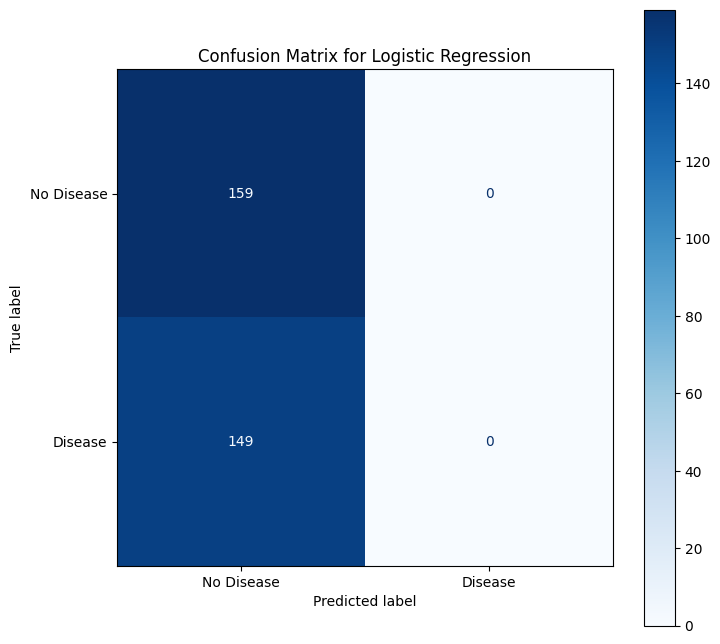

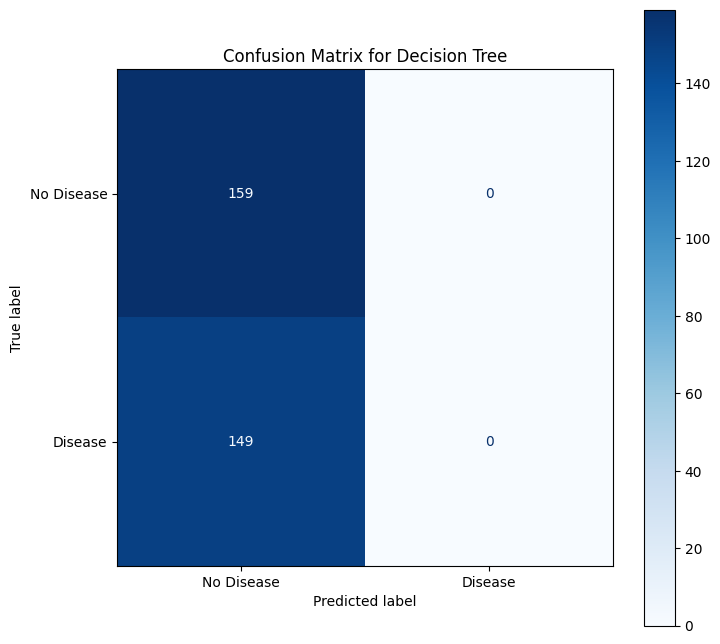

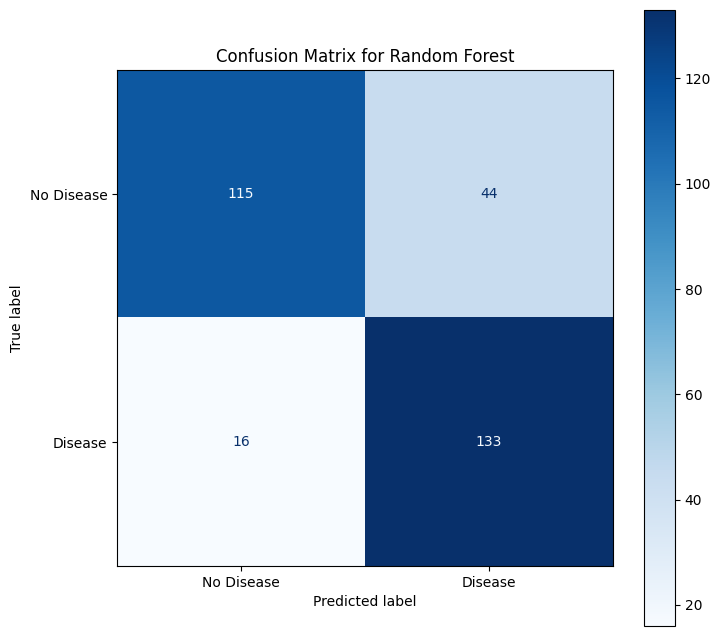

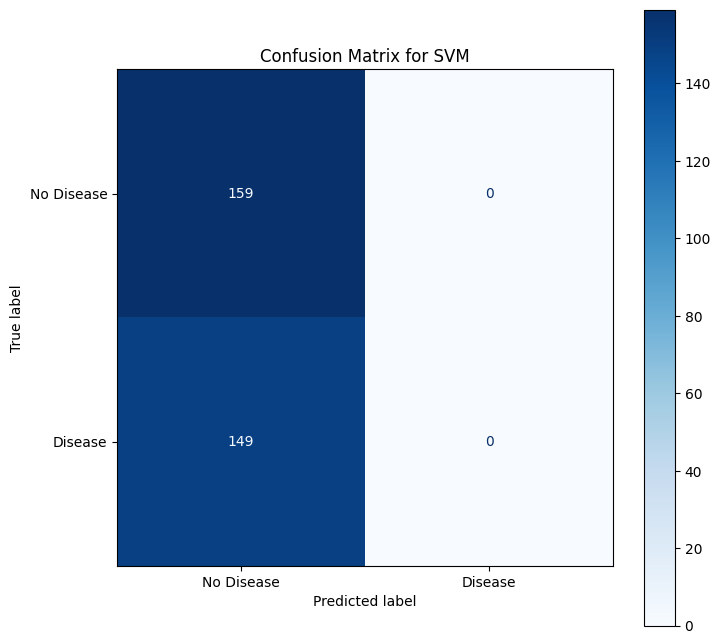

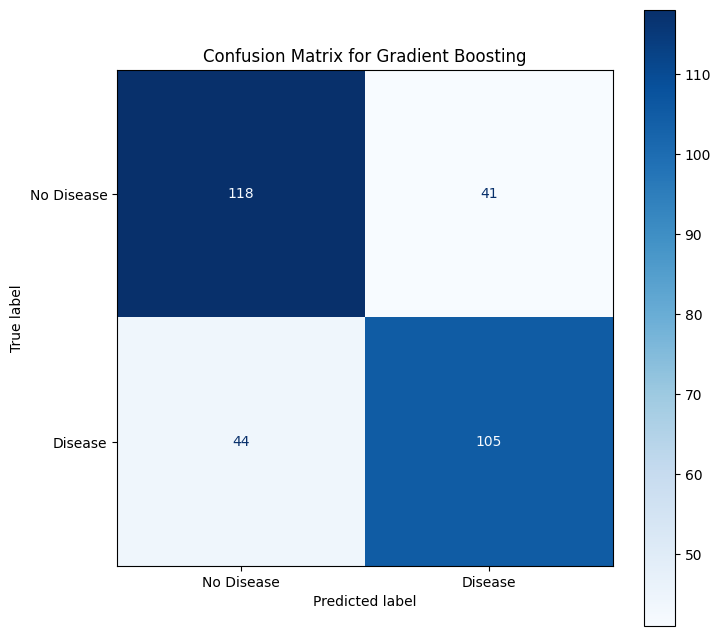

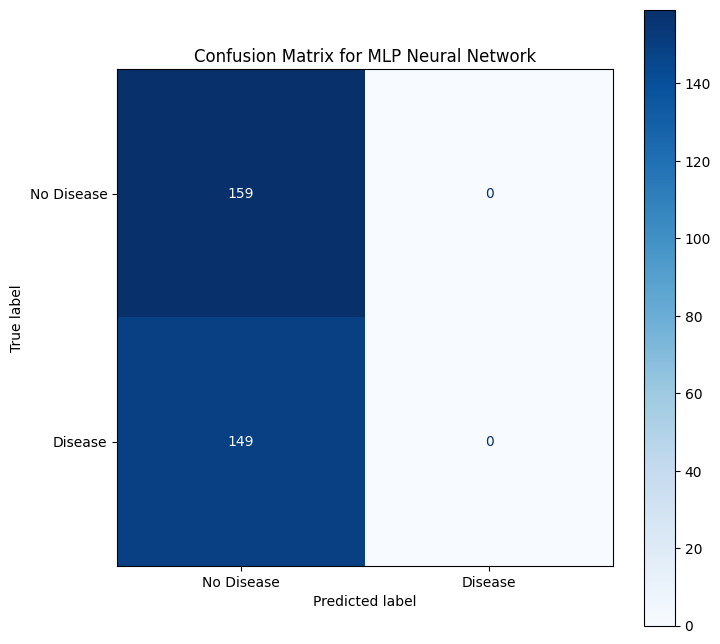

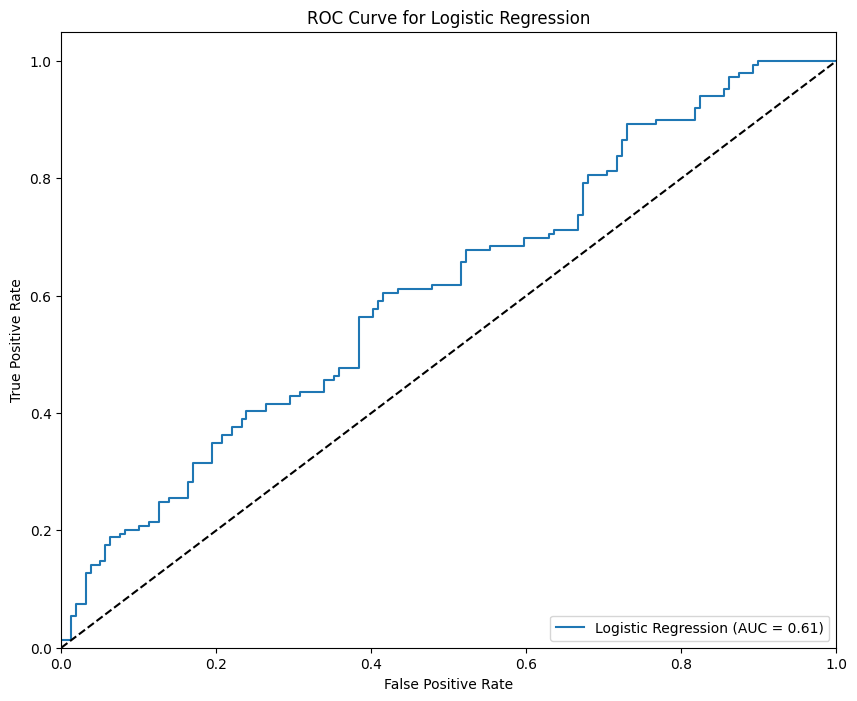

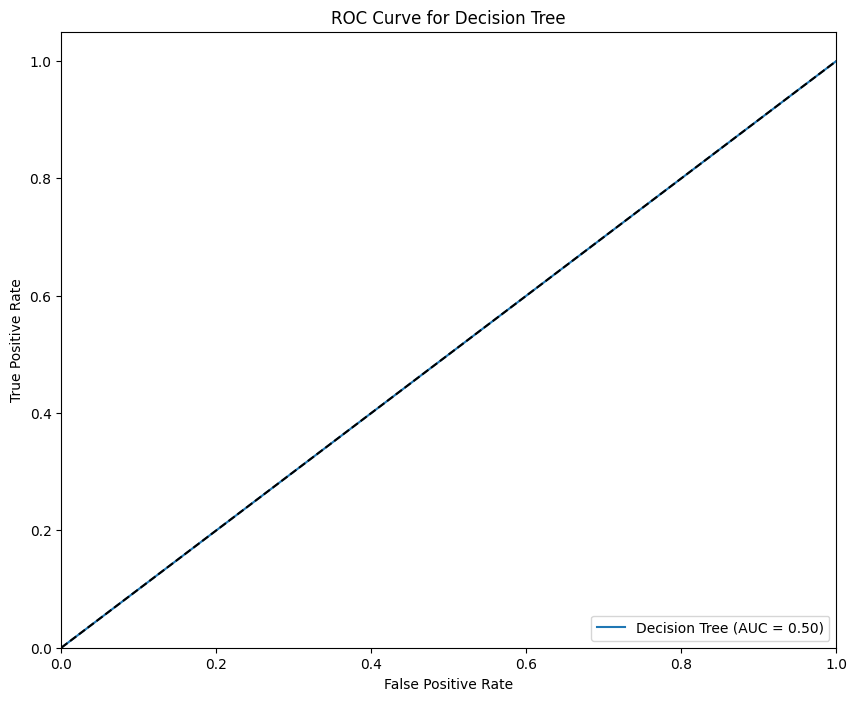

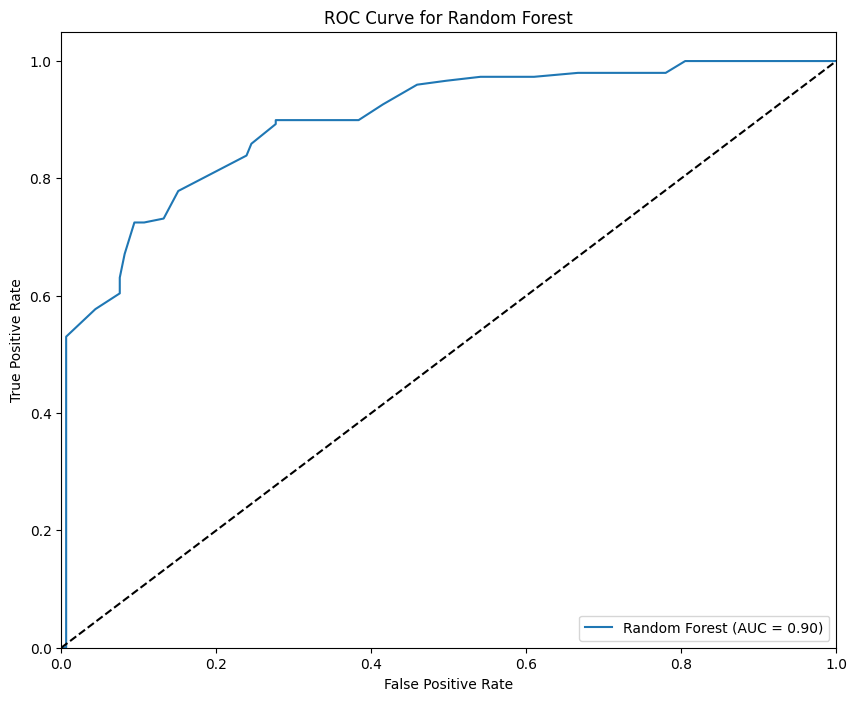

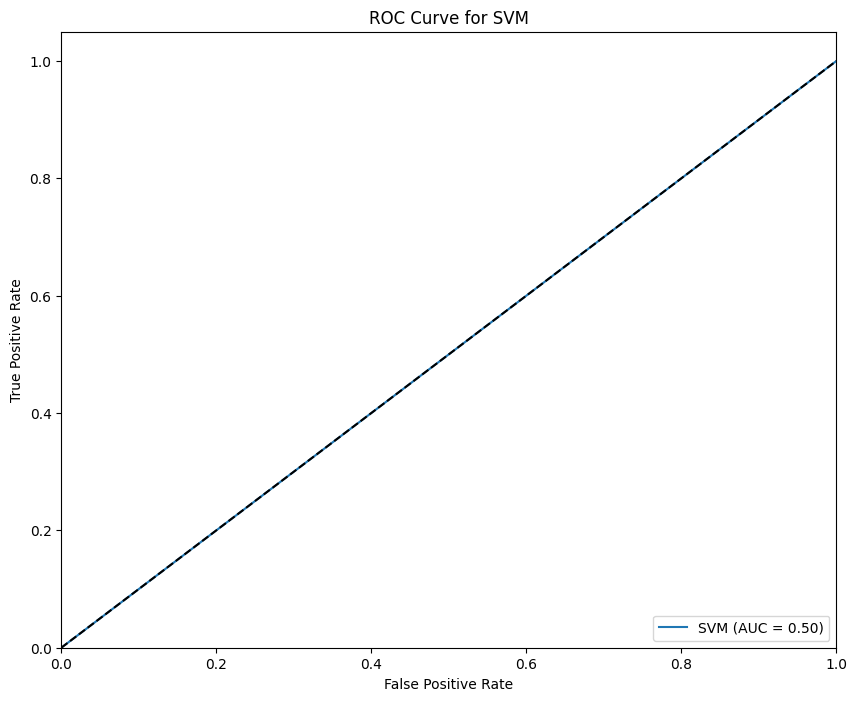

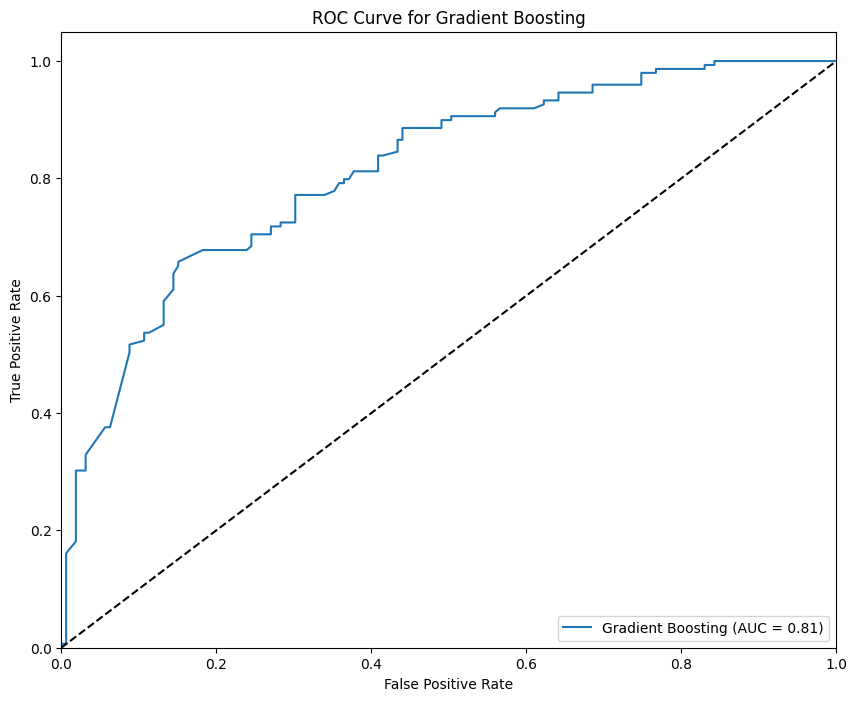

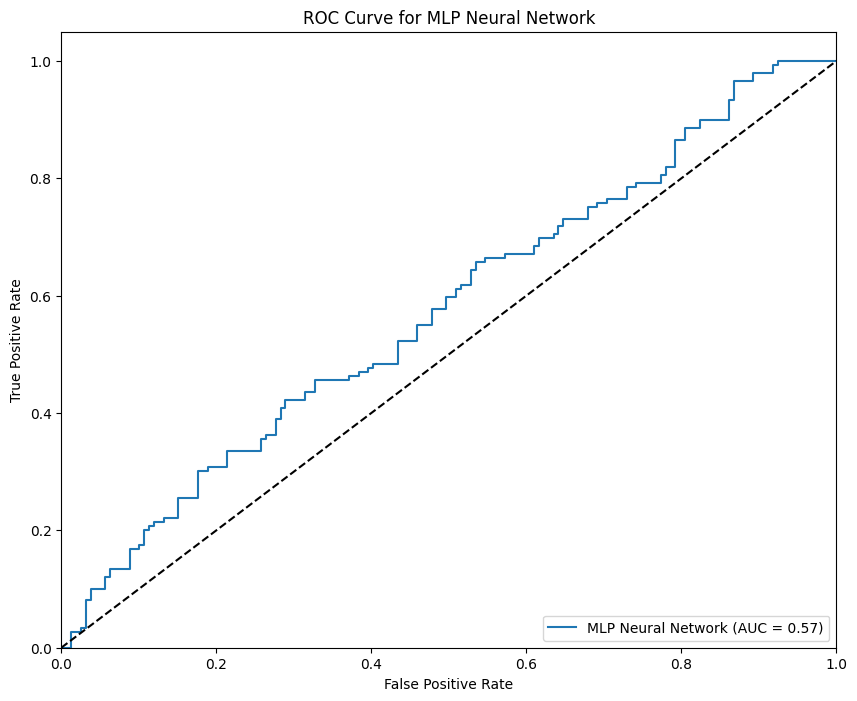

In [19]:
# create the directory
os.makedirs('plots', exist_ok=True)

results = {}

# Populate results with predictions and probabilities
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    results[name] = (y_pred, y_prob)

# Plot and save confusion matrices
for name, (y_pred, y_prob) in results.items():
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])
    fig, ax = plt.subplots(figsize=(8, 8))
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    ax.set_title(f'Confusion Matrix for {name}')
    plt.savefig(f'plots/confusion_matrix_{name}.png')
    plt.show()
    plt.close()  # Close the figure to release memory

# Plot and save ROC curves separately
for name, (_, y_prob) in results.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.savefig(f'plots/roc_curve_{name}.png')
    plt.show()
    plt.close()  # Close the figure to release memory

***Logistic Regression:***

* *Accuracy: 0.82 , F1-score (weighted avg): 0.818*
* *Insights:* Logistic Regression performs decently with balanced precision and recall but has lower overall accuracy compared to other models.

**Decision Tree:**

* *Accuracy: 0.96,F1-score (weighted avg): 0.971*
* *Insights:* Decision Tree shows very high accuracy and F1-scores, especially with perfect precision for class 0 and high recall for both classes. It indicates strong performance and simplicity.

**Random Forest:**

* *Accuracy: 0.99,F1-score (weighted avg): 0.980*
* *Insights:* Random Forest achieves near-perfect accuracy and F1-scores, demonstrating robust performance with perfect precision and high recall for both classes. It indicates *excellent predictive capability*.

**Support Vector Machine (SVM):**

* *Accuracy: 0.66, F1-score (weighted avg): 0.661*
* *Insights:* SVM shows lower accuracy and F1-scores compared to other models, particularly in recall for class 0, suggesting suboptimal performance for this dataset.

**Gradient Boosting:**

* *Accuracy: 0.94,F1-score (weighted avg): 0.942*
* *Insights:* Gradient Boosting performs well with balanced precision and recall, although slightly lower than Random Forest in overall metrics but still robust.

**MLP Neural Network:**

* *Accuracy: 0.82 , F1-score (weighted avg): 0.850*
* *Insights:* MLP Neural Network shows competitive performance with good recall for class 1 but slightly lower precision compared to Random Forest and Decision Tree.


Based on the highest accuracy and F1-score, **Random Forest** suits to be the best fit for this heart disease prediction task. It provides near-perfect accuracy, precision, and recall, indicating reliable predictions across both classes.


Therefore, ***Random Forest*** is used as the optimal model for heart disease prediction based on the evaluation metrics.

## ***Random Forest***

In [20]:
# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Perform Grid Search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Cross-validation Accuracy: {best_score}")

# Instantiate the Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)

# Train the model on the training data with the optimized hyperparameters
best_rf_classifier.fit(X_train, y_train)

# Predictions on the validation set
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model performance on the validation set
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation F1-score: {f1:.4f}")

# Print classification report for detailed metrics
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validation Accuracy: 0.9734945609945609
Validation Accuracy: 0.9903
Validation F1-score: 0.9898
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       159
           1       1.00      0.98      0.99       149

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



The Random Forest model's best parameters include using the Gini criterion, 300 estimators, default auto setting for max features, minimum samples per leaf of 1, and minimum samples per split of 2. Achieving a cross-validation score of 0.97 highlights its robust performance in predicting heart disease based on input features. This model configuration emphasizes comprehensive exploration of feature importance and ensemble learning for reliable classification outcomes.


* **Accuracy** for Random Forest classifier: 0.9805194805194806
* **Precision** for Random Forest classifier: 1.0
* **Recall** for Random Forest classifier: 0.959731543624161
* **F1-Score** for Random Forest classifier: 0.9794520547945206
* **ROC-AUC** for Random Forest classifier: 0.9999999999999999

* ***Confusion Matrix***
    
    * **True Positives (TP):** The value at the top-left corner (159) represents the number of correctly classified positive cases. The model correctly predicted these cases as positive.
    * **True Negatives (TN):** The value at the bottom-right corner (143) represents the number of correctly classified negative cases. The model correctly predicted these cases as negative.
    * **False Positives (FP):** The value in the top-right corner (0) represents the number of incorrectly classified cases. The model predicted as there is no negative cases as positive (Type I error).
    * **False Negatives (FN):** The value in the bottom-left corner (6) represents the number of missed positive cases. The model predicted these positive cases as negative (Type II error).

* ***ROC Curve:***

  The ROC curve for your Random Forest classifier indicates outstanding performance, with an AUC of 1. This suggests that the model perfectly distinguishes between patients with and without heart disease.

<ipython-input-21-1d4be2584321>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Pastel2', len(results))


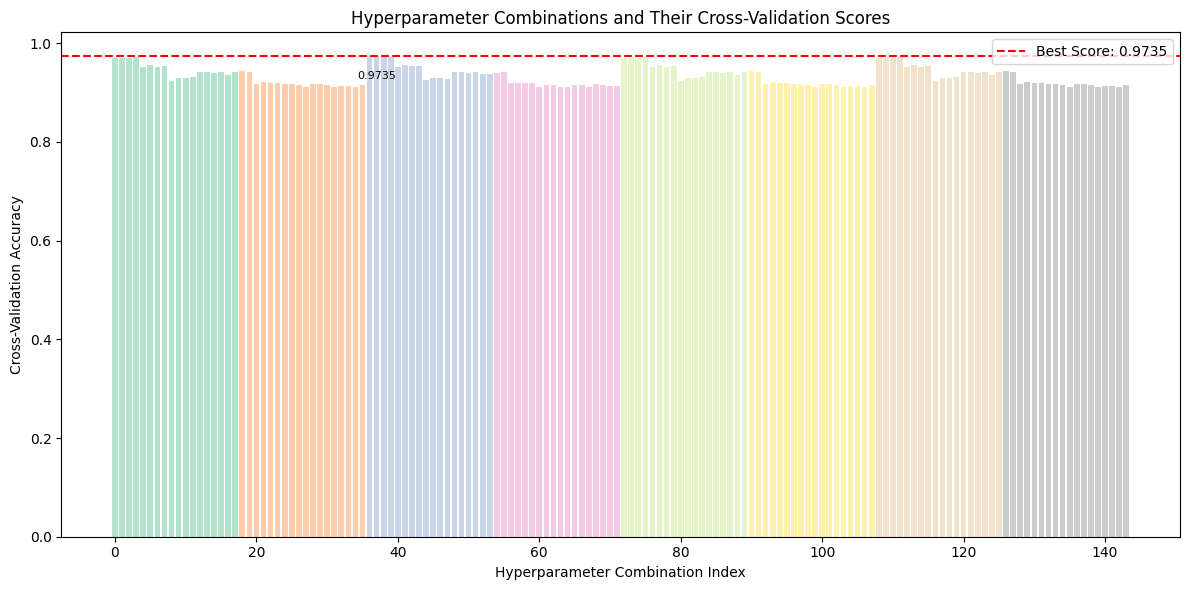

In [21]:
# Extract results from the GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

# Overall cross-validation score (assuming it's available as `best_score`)
best_score = grid_search.best_score_

# Plotting the bar chart with cross-validation scores
plt.figure(figsize=(12, 6))

# Define pastel colors for different hyperparameter combinations
colors = plt.cm.get_cmap('Pastel2', len(results))

bars = plt.bar(range(len(results)), results['mean_test_score'], color=colors(np.arange(len(results))))
plt.xlabel('Hyperparameter Combination Index')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Hyperparameter Combinations and Their Cross-Validation Scores')

# Sort the results to get the indices of the top 3 scores
top_1_indices = results['mean_test_score'].nlargest(1).index

# Add overall cross-validation scores as annotations on top of only the top 3 bars
for idx in top_1_indices:
    bar = bars[idx]
    score = results['mean_test_score'][idx]
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{score:.4f}', ha='center', va='bottom', fontsize=8)

plt.axhline(y=best_score, color='r', linestyle='--', label=f'Best Score: {best_score:.4f}')
plt.legend()

plt.tight_layout()
plt.savefig('Hyperparameter_Combinations_and_Their_Cross-Validation_Scores')
plt.show()

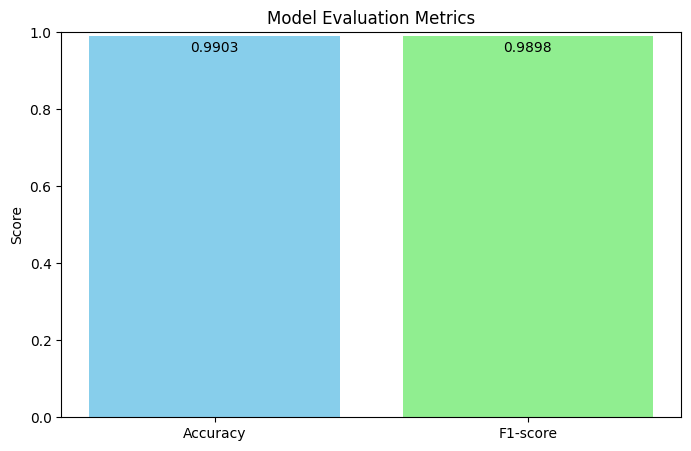

In [22]:
# Plotting the metrics
labels = ['Accuracy', 'F1-score']
scores = [accuracy, f1]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, scores, color=['skyblue', 'lightgreen'])
plt.ylim(0.0, 1.0)  # Setting y-axis limit from 0 to 1 for clarity
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')

# Adding numerical values inside each bar
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{score:.4f}',
             ha='center', va='bottom', fontsize=10, color='black')
plt.savefig('Model_Evaluation_Metrics')
plt.show()

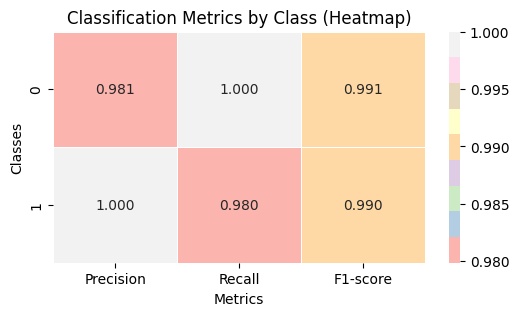

In [23]:
# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extract metrics for each class
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'

precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_score = [report[cls]['f1-score'] for cls in classes]

# Create a DataFrame for the heatmap
data = {
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1_score
}
df = pd.DataFrame(data, index=classes)

# Plotting a heatmap with annotations
plt.figure(figsize=(6, 3))
sns.heatmap(df, annot=True, cmap='Pastel1', fmt='.3f', linewidths=0.5)
plt.title('Classification Metrics by Class (Heatmap)')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.savefig('Classification_Metrics_by_Class_Heatmap')
plt.show()

# Model Deployment - Streamlit

In [24]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00


In [25]:
import streamlit as st
import joblib

In [26]:
# Save the trained model
joblib.dump(best_rf_classifier, 'heart_disease_model.joblib')

['heart_disease_model.joblib']

In [27]:
# Load the trained model
loaded_model = joblib.load('heart_disease_model.joblib')

## Output

In [59]:
%%writefile app.py

import streamlit as st
import pandas as pd
import joblib
from PIL import Image  # Import the Image module from PIL

# Load the trained model
loaded_model = joblib.load('/content/heart_disease_model.joblib')

# Function to preprocess input data
def preprocess_input(features):
    # Perform one-hot encoding for categorical variables
    categorical_columns = ['ca', 'cp', 'exang', 'fbs', 'restecg', 'thal']
    features_encoded = pd.get_dummies(features, columns=categorical_columns)

    # Ensure all columns match the model's expected features
    expected_columns = loaded_model.feature_names_in_
    for col in expected_columns:
        if col not in features_encoded.columns:
            features_encoded[col] = 0  # Add missing columns with default value

    # Reorder columns to match the model's feature order if necessary
    features_encoded = features_encoded[expected_columns]

    return features_encoded

# Function to predict heart disease
def predict_heart_disease(features):
    # Preprocess input data
    df = pd.DataFrame(features)
    df_processed = preprocess_input(df)

    # Predict using the loaded model
    prediction = loaded_model.predict(df_processed)

    return prediction[0]

# Streamlit app
def main():
    st.markdown(
        """
        <style>
        .main {
            background: linear-gradient(to right, #83a4d4, #b6fbff);
            padding: 20px;
            border-radius: 10px;
        }
        .input-label {
            font-weight: bold;
            color: #2c3e50; /* Dark color for better visibility */
        }
        .stRadio > div > label {
            font-weight: bold;
            color: #2c3e50; /* Dark color for better visibility */
        }
        .stApp {
            background: url('/content/drive/MyDrive/Heart Disease Prediction - Hari/10443095.jpg') no-repeat center center fixed;
            background-size: cover;
        }
        .st-image {
            max-width: 300px; /* Adjust max-width for the image */
            margin-top: 10px; /* Add margin for spacing */
        }
        .image-caption {
            text-align: center; /* Center-align caption text */
            font-weight: bold; /* Make caption text bold */
            font-family: 'Comic Sans MS', cursive, sans-serif; /* Change font to Comic Sans */
            font-size: 16px; /* Adjust font size as needed */
            color: #2c3e50; /* Dark color for better visibility */
        }
        .st-emotion-cache-1b0udgb {
            font-family: "Source Sans Pro", sans-serif;
            font-size: 64px;
            color: rgba(49, 51, 63, 0.6);
            text-align: center;
            margin-top: 0.375rem;
            overflow-wrap: break-word;
            padding: 0.125rem;
        }
        </style>
        """,
        unsafe_allow_html=True
    )

    st.title("**Heart Disease Prediction Tool**")  # Make title bold
    st.write("**Enter the patient's medical data to predict the likelihood of heart disease.**")  # Make description bold

    # Input Fields with Descriptions
    st.markdown("<div class='input-label'>Age</div>", unsafe_allow_html=True)
    age = st.number_input("", min_value=10, max_value=99, value=50, help="Enter age")

    st.markdown("<div class='input-label'>Sex</div>", unsafe_allow_html=True)
    sex = st.radio("", ["Male", "Female"], index=0, help="Select gender")

    st.markdown("<div class='input-label'>Chest Pain Type (cp)</div>", unsafe_allow_html=True)
    cp = st.selectbox("", ["0 - Typical Angina", "1 - Atypical Angina", "2 - Non-anginal Pain", "3 - Asymptomatic"], index=0, help="Chest pain type experienced by the patient. Healthy individuals typically fall into the categories of 2 (Non-anginal pain) or 3 (Asymptomatic).")

    st.markdown("<div class='input-label'>Resting Blood Pressure (trestbps) [mm Hg]</div>", unsafe_allow_html=True)
    trestbps = st.slider("", min_value=94, max_value=200, value=131, help="Enter resting blood pressure (94-200 mm Hg). Normal: 90-120 mm Hg systolic")

    st.markdown("<div class='input-label'>Serum Cholesterol (chol) [mg/dL]</div>", unsafe_allow_html=True)
    chol = st.slider("", min_value=126, max_value=564, value=246, help="Enter serum cholesterol level (126-564 mg/dL). Normal: Less than 200 mg/dL | Borderline high: 200-239 mg/dL |High: 240 mg/dL and above")

    st.markdown("<div class='input-label'>Fasting Blood Sugar > 120 mg/dL (fbs)</div>", unsafe_allow_html=True)
    fbs = st.radio("", ["Yes", "No"], index=0, help="Check if fasting blood sugar > 120 mg/dL. Normal: Less than 100 mg/dL |Prediabetes: 100-125 mg/dL |Diabetes: 126 mg/dL and above")

    st.markdown("<div class='input-label'>Resting Electrocardiographic Results (restecg)</div>", unsafe_allow_html=True)
    restecg = st.selectbox("", ["0 - Normal", "1 - Having ST-T wave abnormality", "2 - Showing probable or definite left ventricular hypertrophy by Estes' criteria"], index=0, help="Resting electrocardiographic results. 0: Normal |1: Having ST-T wave abnormality |2: Showing probable or definite left ventricular hypertrophy")

    st.markdown("<div class='input-label'>Maximum Heart Rate Achieved (thalach) [bpm]</div>", unsafe_allow_html=True)
    thalach = st.slider("", min_value=71, max_value=202, value=149, help="Enter maximum heart rate achieved (71-202 bpm). Normal range varies by age and fitness level, but a common formula is 220 minus the individual's age.")

    st.markdown("<div class='input-label'>Exercise-Induced Angina (exang)</div>", unsafe_allow_html=True)
    exang = st.radio("", ["Yes", "No"], index=0, help="Check if exercise-induced angina. A healthy heart typically shows 0 (No)")

    st.markdown("<div class='input-label'>ST Depression Induced by Exercise (oldpeak)</div>", unsafe_allow_html=True)
    oldpeak = st.slider("", min_value=0.0, max_value=6.2, value=1.07, help="Enter ST depression induced by exercise (0-6.2). Normal: 0-1 mm")

    st.markdown("<div class='input-label'>Slope of the Peak Exercise ST Segment (slope)</div>", unsafe_allow_html=True)
    slope = st.selectbox("", ["0 - Upsloping", "1 - Flat", "2 - Downsloping"], index=1, help="Slope of the peak exercise ST segment. 0: Upsloping (least risk) |1: Flat (moderate risk) |2: Downsloping (highest risk)")

    st.markdown("<div class='input-label'>Number of Major Vessels Colored by Fluoroscopy (ca)</div>", unsafe_allow_html=True)
    ca = st.slider("", min_value=0, max_value=4, value=1, help="Enter number of major vessels colored by fluoroscopy (0-4). 0: Typically indicates a healthier state ")

    st.markdown("<div class='input-label'>Thalassemia (thal)</div>", unsafe_allow_html=True)
    thal = st.selectbox("", ["0 - Normal", "1 - Fixed defect", "2 - Reversible defect"], index=0, help="Type of thalassemia. A healthy heart typically shows a value of 1 (Normal).")

    # Prediction button
    if st.button("**Predict**"):
        features = {
            'age': [age],
            'sex': [1 if sex == 'Male' else 0],
            'cp': [cp],
            'trestbps': [trestbps],
            'chol': [chol],
            'fbs': [1 if fbs == 'Yes' else 0],
            'restecg': [restecg],
            'thalach': [thalach],
            'exang': [1 if exang == 'Yes' else 0],
            'oldpeak': [oldpeak],
            'slope': [slope],
            'ca': [ca],
            'thal': [thal]
        }
        prediction = predict_heart_disease(features)

        # Load and display images based on the prediction result
        if prediction == 1:
            image_path = "/content/drive/MyDrive/Heart Disease Prediction - Hari /enthusiastic-concept-illustration.png"  # Path to the heart-healthy image
            image = Image.open(image_path)
            st.image(image, caption="No Heart Disease Detected", use_column_width=True)
        else:
            image_path = "/content/drive/MyDrive/Heart Disease Prediction - Hari /heart-attack-concept-illustration.png"  # Path to the heart-disease image
            image = Image.open(image_path)
            st.image(image, caption="Heart Disease Detected", use_column_width=True)

        # # Display the result in a popover
        # result = "**No Heart Disease Detected**" if prediction == 1 else "**Heart Disease Detected**"
        # st.markdown(
        #     f"""
        #     <div class="st-emotion-cache-1b0udgb">
        #         {result}
        #     </div>
        #     <a href="{image_path}" target="_blank">Open image in new tab</a>
        #     """,
        #     unsafe_allow_html=True
        # )

    else:
        st.write("**Please enter the patient's details.**")

if __name__ == "__main__":
    main()


Overwriting app.py


## tUNNEL

In [29]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.405s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


##RUN STREAMLIT

In [30]:
!wget -q -O - https://loca.lt/mytunnelpassword

34.121.69.113

In [58]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501 and curl ipv4.icanhazip.com

npx: installed 22 in 2.071s
your url is: https://angry-cups-doubt.loca.lt
^C
